### Glass Identification

#### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

-  Attribute Information-
-  Id number: 1 to 214
-  RI: refractive index
-  Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron

### The Target label, Type of Glass has 6 classes:

- 1: building_windows_float_processed
- 2: building_windows_non_float_processed
- 3: vehicle_windows_float_processed
- 5: containers
- 6: tableware
- 7: headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


The dataset has numerical data in the dataset with Target variable Type

In [4]:
df.shape

(214, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


The dataset has dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There are no null values in the dataset

In [7]:
df.duplicated().sum()

1

We have 1 duplicate values in dataset

In [8]:
df[df.duplicated()]
duplicate_rows = df[df.duplicated(subset=df.columns,keep=False)]
duplicate_rows 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


we have 2 duplicate rows

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

No more duplicates in dataset

In [11]:
for i in df:
    print(df[i].value_counts())
    print('\n')

RI
1.51645    3
1.52152    3
1.51590    3
1.51674    2
1.51769    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.31    1
14.17    1
13.51    1
13.81    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg
0.00    42
3.48     8
3.54     8
3.58     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Al
1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
72.34    1
72.26    1
73.26    1
73.25    1
73.61    1
Name: count, Length: 133, dtype: int64


K
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: count, Length: 65, dtype: int64


Ca

We can find the occurrences of each unique value in the series from value_count() method

In [12]:
df.nunique().to_frame('No: of unique values')

,No: of unique values
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type,6


We now know the unique values in each variable

In [13]:
numerical_col=[]
for col in df.dtypes.index:
    if df[col].dtypes == 'float64':
        numerical_col.append(col)
print(numerical_col)    

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


We clearly identified numerical variables in the dataset

In [14]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


- The count of each variable is 213 indicates no null values
- The mean and std is reasonbly fair enough except Al so may be distribution of data is sensible
- The mean and median has slight difference so the data may be skewed
- The 3rd quartile and max is fair enough might be dataset has few outliers

### Data Visualization

##### Univariate Analysis

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

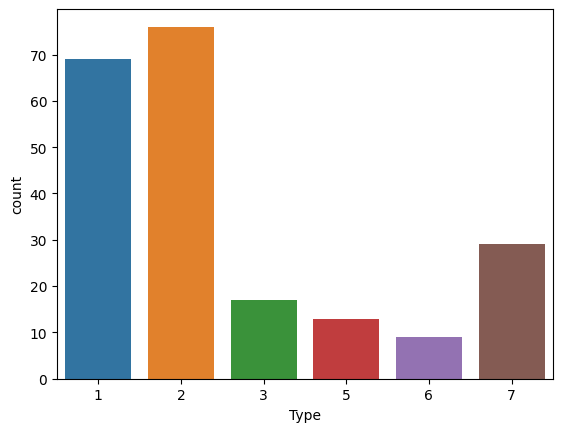

In [15]:
sns.countplot(x = 'Type', data= df)
df['Type'].value_counts()

We can see the freuency of Type 2 is higher when compared to other type of glasses in the dataset ie 
- 2: building_windows_non_float_processed
- 1: building_windows_float_processed
- 7: headlamps

#### Bivariate analysis

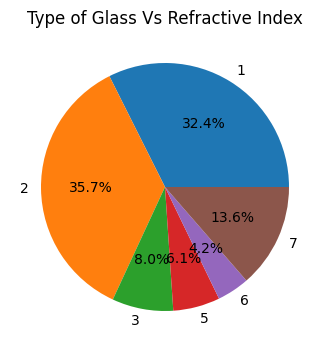

In [16]:
plt.figure(figsize=(4,10))
type_glass_RI = df.groupby('Type')['RI'].sum()
type_glass_RI.plot.pie(autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Type of Glass Vs Refractive Index')
plt.show()

Refractive Index implies quaity of glass 
- Type 2 glass has high RI followed by type 1 and 7
- Type 6 has low refractive index ie table ware glass

##### Bivariate Analysis

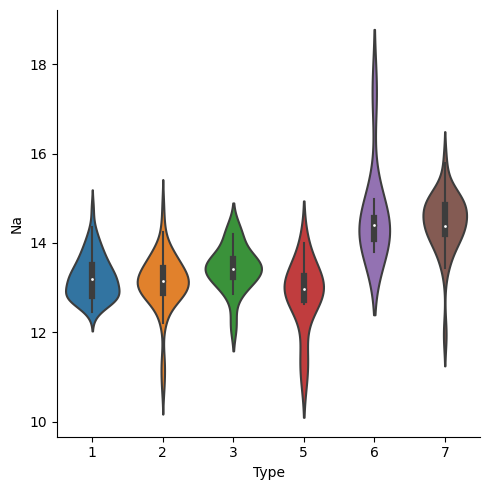

In [17]:
sns.catplot( x='Type' ,y='Na', kind='violin', data = df)
#sns.barplot( x='Type' ,y='Na', data = df)

Glass type 1, 2, and 3 have similar distributions of Sodium content
Glass type 5 has the lowest median Sodium content
Glass type 6 and 7 have higher median Sodium content
The width of the violin for each type indicates the density of data points at different Sodium content levels. For example, the wide base of the violin for type 1 and 2 indicates a high density of data points around Sodium content of 12.5 to 13.5.

<Axes: xlabel='Type', ylabel='Mg'>

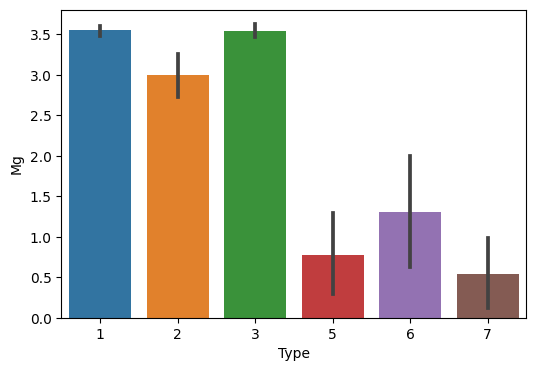

In [18]:
plt.figure(figsize=(6,4))
sns.barplot( x='Type' ,y='Mg', data = df)

- The float processed glass ie is type 1 and type has Mg content around 3.5 which are used making building windows or vehicle window, which are strong for chemical durability and thermal expansion properties

- Non float glass type 2 is also used in making building windows

<Axes: xlabel='Type', ylabel='Al'>

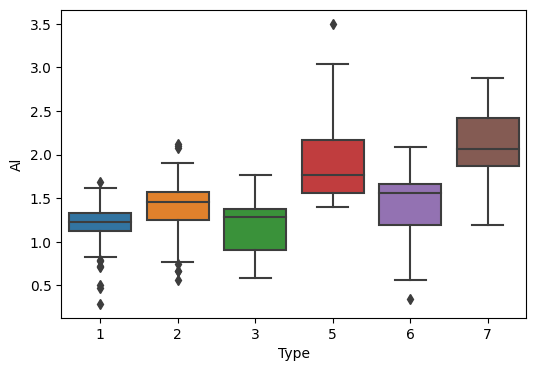

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot( x='Type' ,y='Al', data = df)

- Glass type 7 has the highest median Al content and high range, then followed by glass type 5
- Glass type 2 and 6 have lower median Al content
- Glass type 1 and 3 have similar distributions of Al content

<Axes: xlabel='Type', ylabel='Si'>

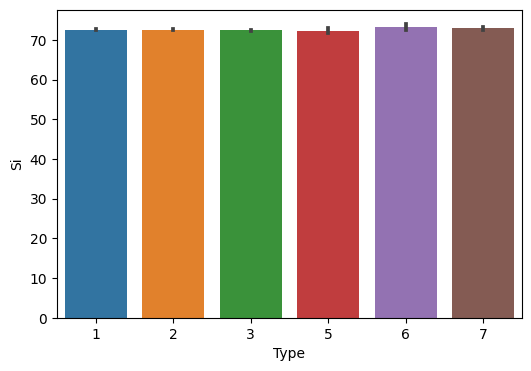

In [20]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Type', y = 'Si')

- The average Silicon content is relatively consistent across different types of glass, with most types having an average Silicon content around 72 to 73.

<Axes: xlabel='Type', ylabel='K'>

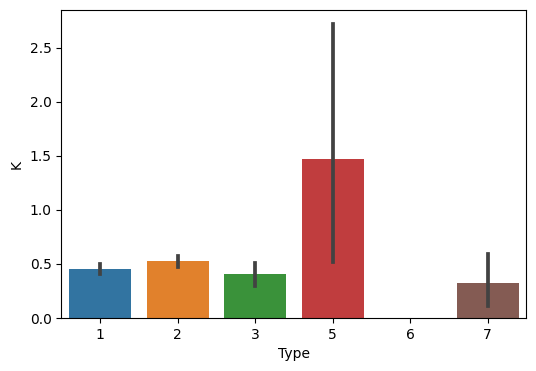

In [21]:
plt.figure(figsize=(6,4))
sns.barplot( x='Type' ,y='K',  data = df)

- Glass type 1, 2, and 3 have almostsimilar and relatively low average Potassium content, around 0.5.
- Glass type 5 have significantly higher average Potassium content, around 1.5
- Glass type 6 have no significance in Potassium content

- This suggests that Potassium content varies significantly across different types of glass and could be a strong feature for distinguishing between different types of glass

<Axes: xlabel='Type', ylabel='Ca'>

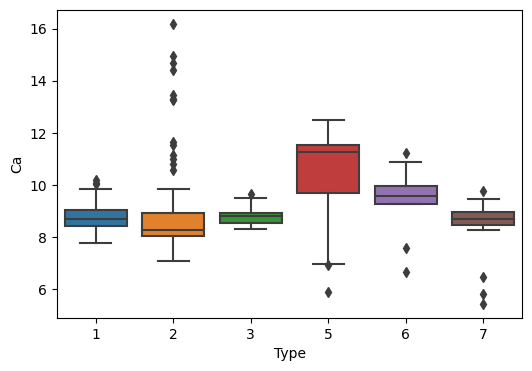

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot( x='Type' ,y='Ca',  data = df)

- Glass type 1 and 3 have similar distributions of Calcium content, with the different median 
- Glass type 2 and 7 have lower median Calcium content
- Glass type 5 has a higher median Calcium content, around 11
- There are some outliers in all glass type 
- This suggests that Calcium (Ca) content varies across different types of glass and could be a useful feature in predicting the type of glass. 
- The outliers in types 2 and 3 might indicate some unique samples that could be further investigated.

<Axes: xlabel='Type', ylabel='Ba'>

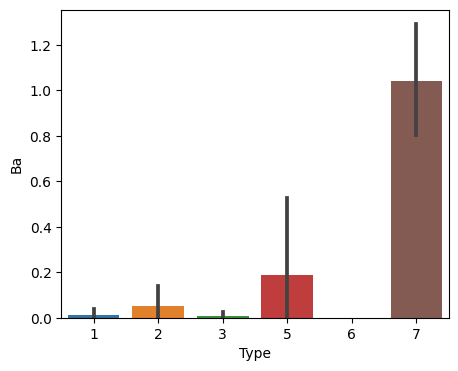

In [23]:
plt.figure(figsize=(5,4))
sns.barplot( x='Type' ,y='Ba', data = df)

- Glass type 1, 3 and 6 have very low average Barium content, close to 0.
- Glass type 7 have significantly higher average Barium content, around 1.1
- Glass type 5 have significantly average Barium content
- This suggests that Barium (Ba) content varies significantly across different types of glass and could be a strong feature for distinguishing between different types of glass, especially for distinguishing types 2, 5 and 7 from the others.

<Axes: xlabel='Type', ylabel='Fe'>

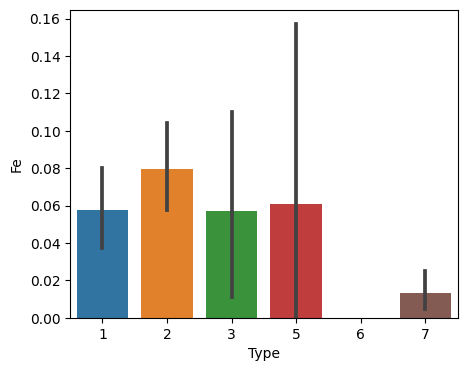

In [24]:
plt.figure(figsize=(5,4))
sns.barplot( x='Type' ,y='Fe', data = df)

- Glass type 1, 3 and 5 have similar and relatively average Iron content, around 0.1.
- Glass type 2 have higher average Iron content, around 0.08
- Glass type 6 have very low average Barium content, close to 0
- This suggests that Iron (Fe) content varies across different types of glass and could be a useful feature in predicting the type of glass

###  Multivariate Analysis

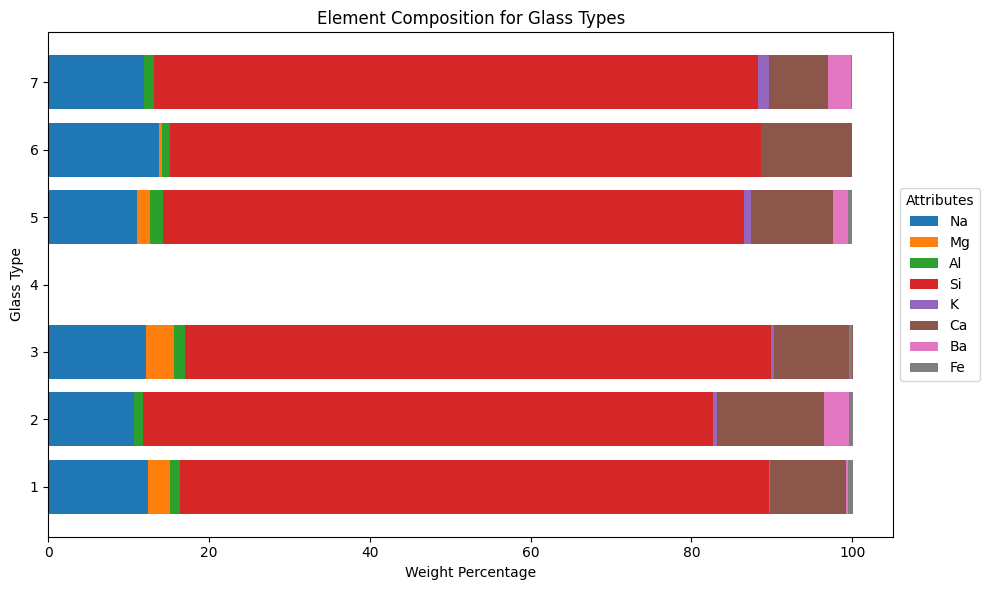

In [25]:
glass_types_to_include = [1, 2, 3, 5, 6, 7]
df = df[df['Type'].isin(glass_types_to_include)]
attributes = df.columns[1:-1] 

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bottoms = [0] * len(df)
for attribute in attributes:
    ax.barh(df['Type'], df[attribute], left=bottoms, label=attribute)
    bottoms = [a + b for a, b in zip(bottoms, df[attribute])]

plt.xlabel('Weight Percentage')
plt.ylabel('Glass Type')
plt.title('Element Composition for Glass Types')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Attributes')

plt.tight_layout()
plt.show()

We can notice the highest weight percentage in type of glass is Si and then followed by Na and Ca
and minute quantities of Fe and K are used may be for colouring the glass

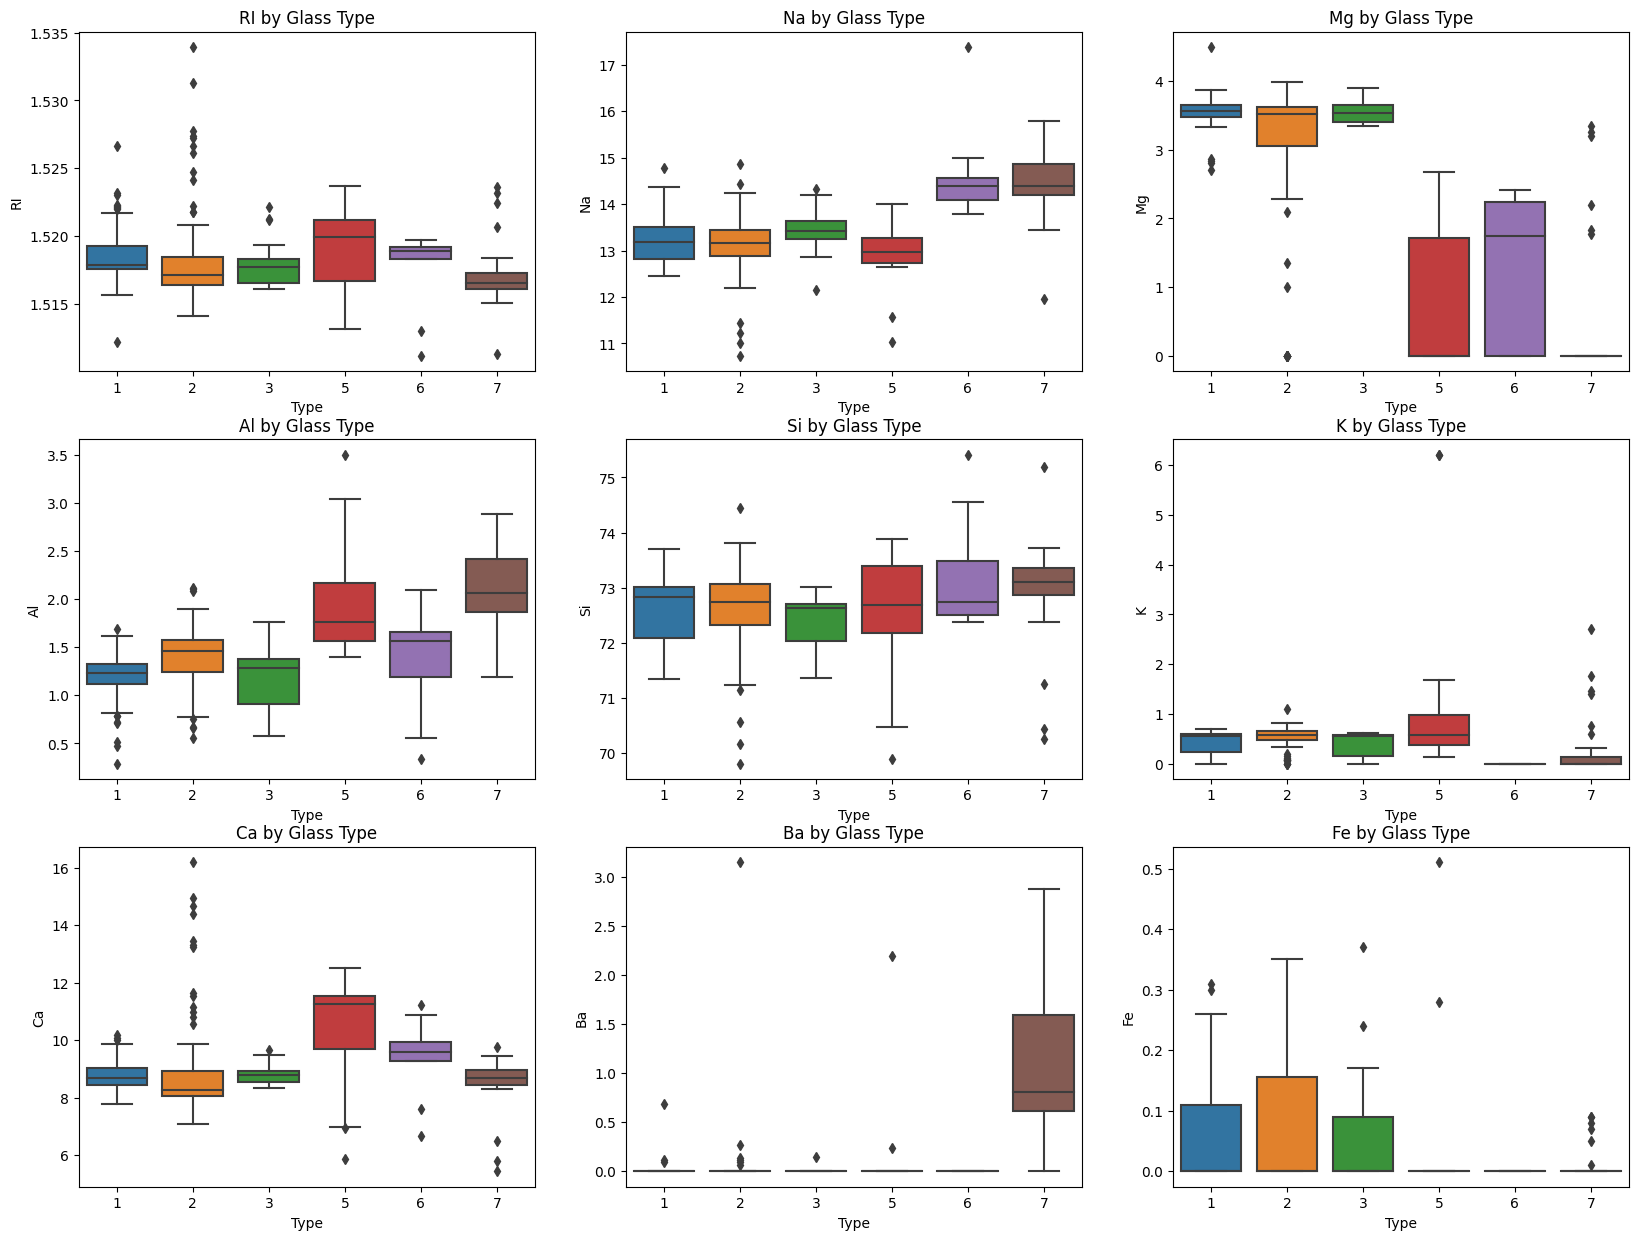

In [26]:
attributes = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))


for i, attr in enumerate(attributes):
    row, col = i // 3, i % 3  # Determine the row and column for the subplot
    ax = axes[row, col]  # Select the subplot
    sns.boxplot(x='Type', y=attr, data=df, ax=ax)  # Create the boxplot
    ax.set_title(f'{attr} by Glass Type')  # Set the title for the subplot


plt.show()


- Ba is used on type 7 making of head lights
- Fe is used in making coloured glass for building in type 1,2,3
- K has very low singnificance in making type of glass
- Mg has high singnificance in making type 1,2,3 glass

<Figure size 2000x2000 with 0 Axes>

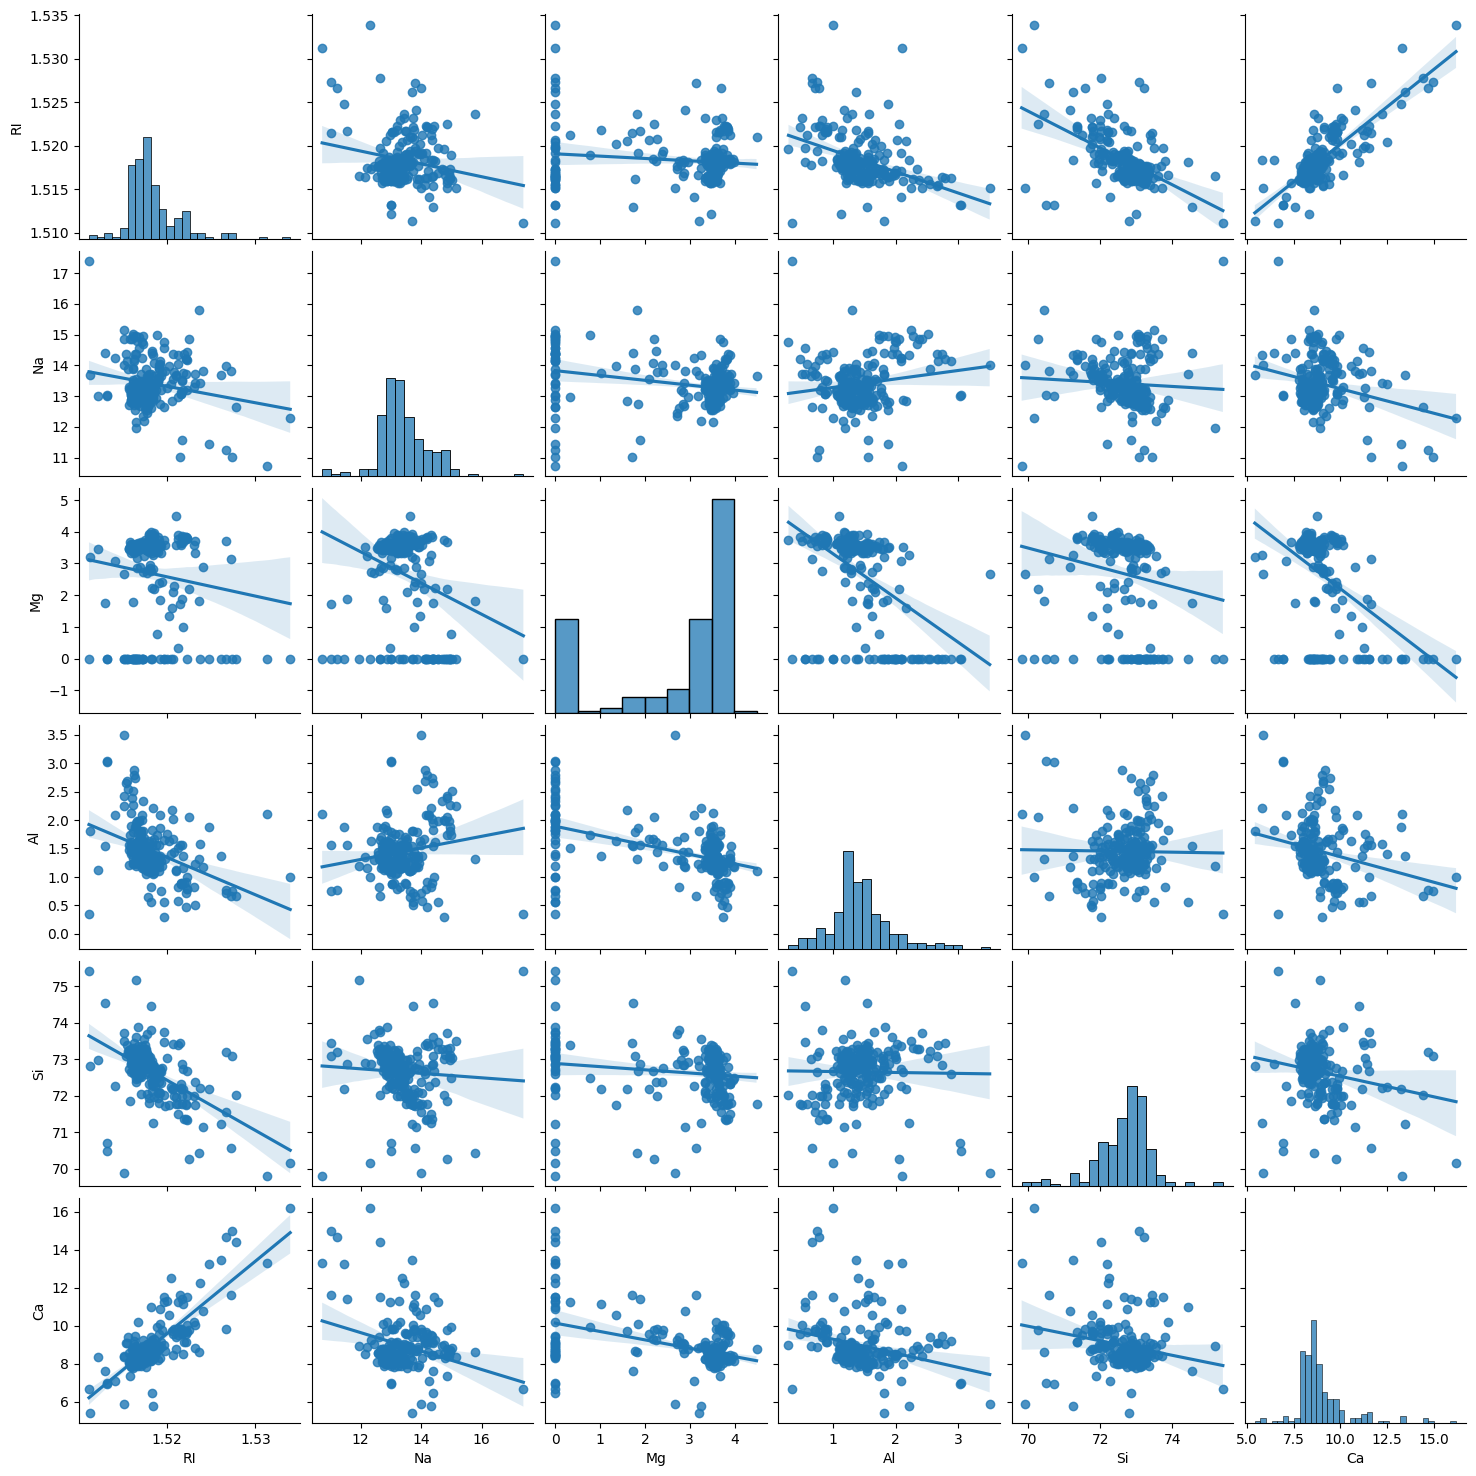

In [27]:
plt.figure(figsize=(20,20))
sns.pairplot(df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')  
plt.show()

- RI and Ca is positively correlated 
- RI and other elements are negatively correlated
- Al  and Mg are strongly negatively correlated
- Some elements have no significant relationship like Si and Mg

<Figure size 2000x2000 with 0 Axes>

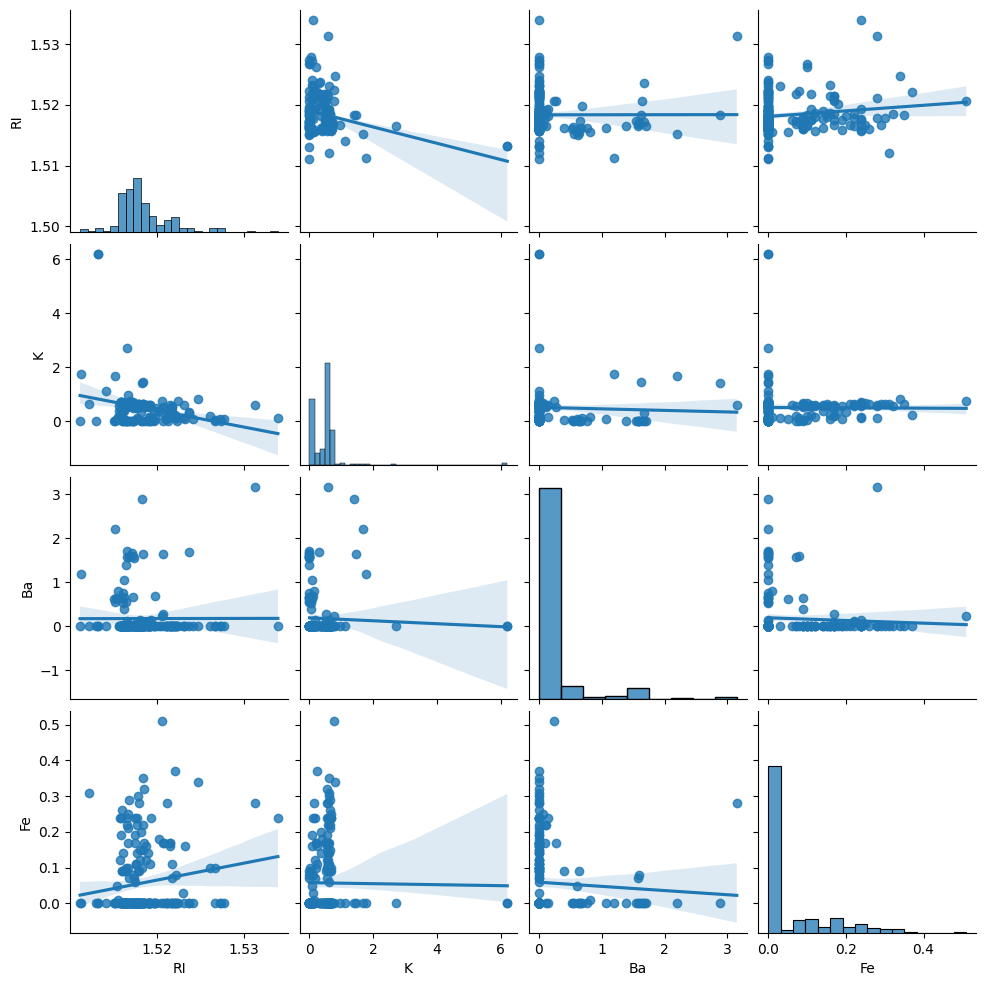

In [28]:
plt.figure(figsize=(20,20))
sns.pairplot(df[['RI','K','Ba','Fe']], kind='reg')  
plt.show()

There is no significant relationship Ba, K, Fe and RI

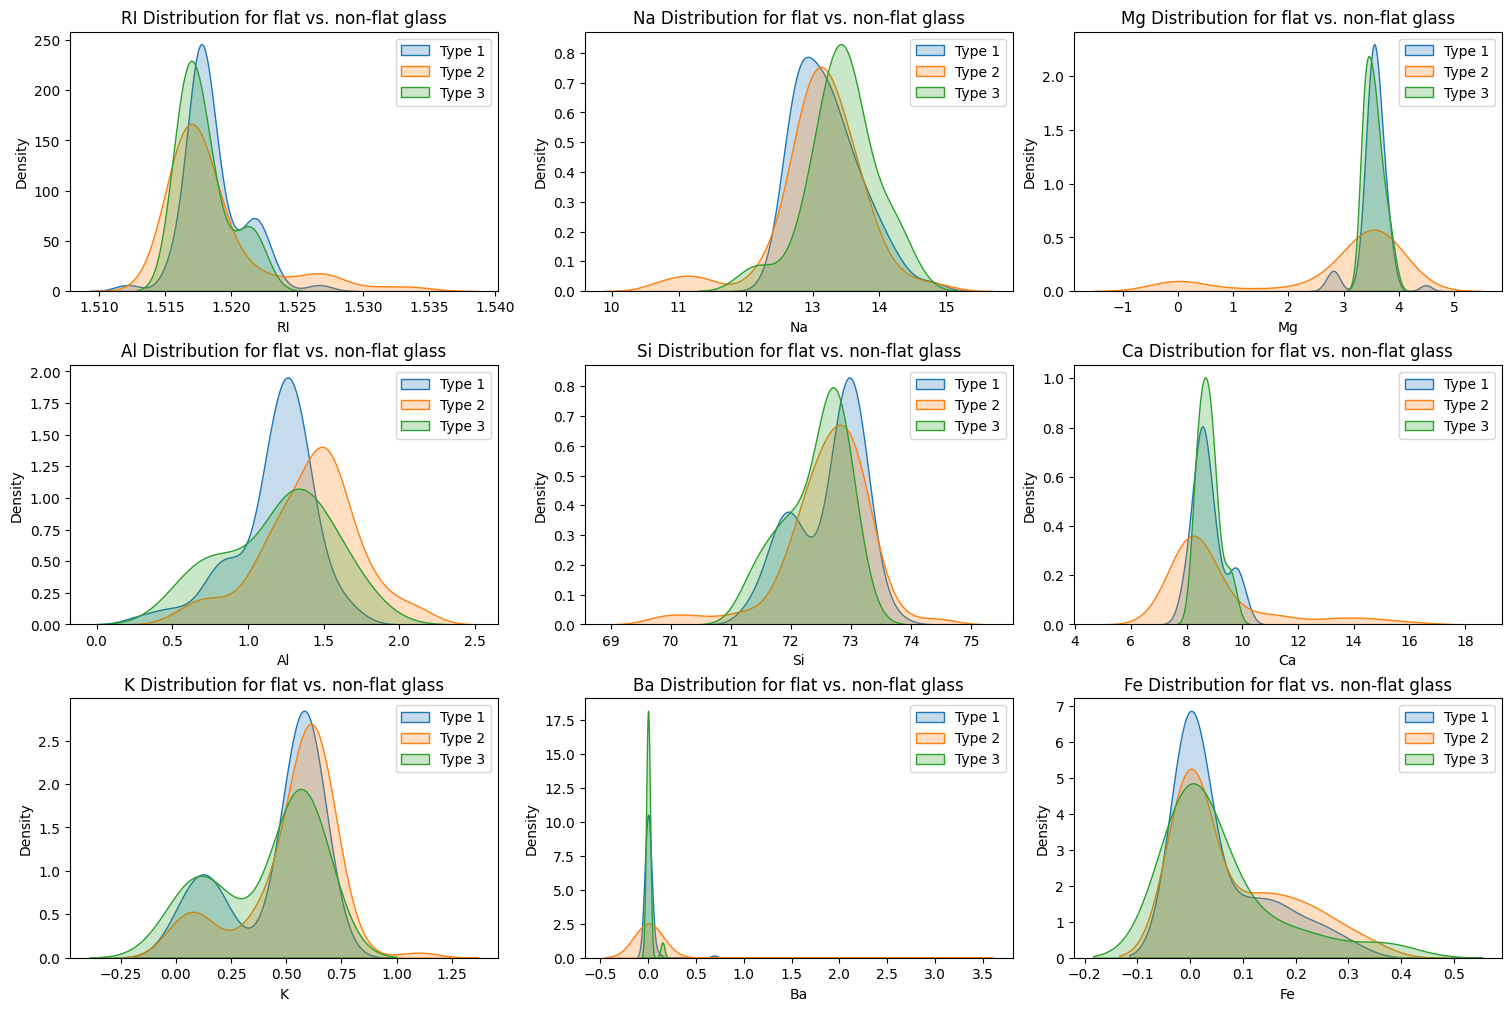

In [29]:
attributes = ['RI', 'Na', 'Mg', 'Al', 'Si','Ca','K','Ba','Fe']
types = [1, 2, 3]

fig, axes = plt.subplots(3, 3, figsize=(15, 10),constrained_layout=True)

for i, attr in enumerate(attributes):
    row, col = i // 3, i % 3 
    ax = axes[row, col] 
    ax.set_title(f"{attr} Distribution for flat vs. non-flat glass")

    for glass_type in types:
        sns.kdeplot(df[attr][df.Type == glass_type], shade=True, label=f'Type {glass_type}', ax=ax)

    ax.legend()

plt.show()


- Type 1 glass tends to have slightly  higher RI than type 2 and type 3 exhibit significantly lower RI 
- Type 1,2,3 tend to have relatively same Na content 
- Type 1,3 have highly concentrated and that there is little variation of Mg but type 2 low concentration and high spread of data
- Very low concentration of Ba were seen in the type 1,2,3 
- K show different variation slightly increased and then decreased and became highat 0.60 concentration

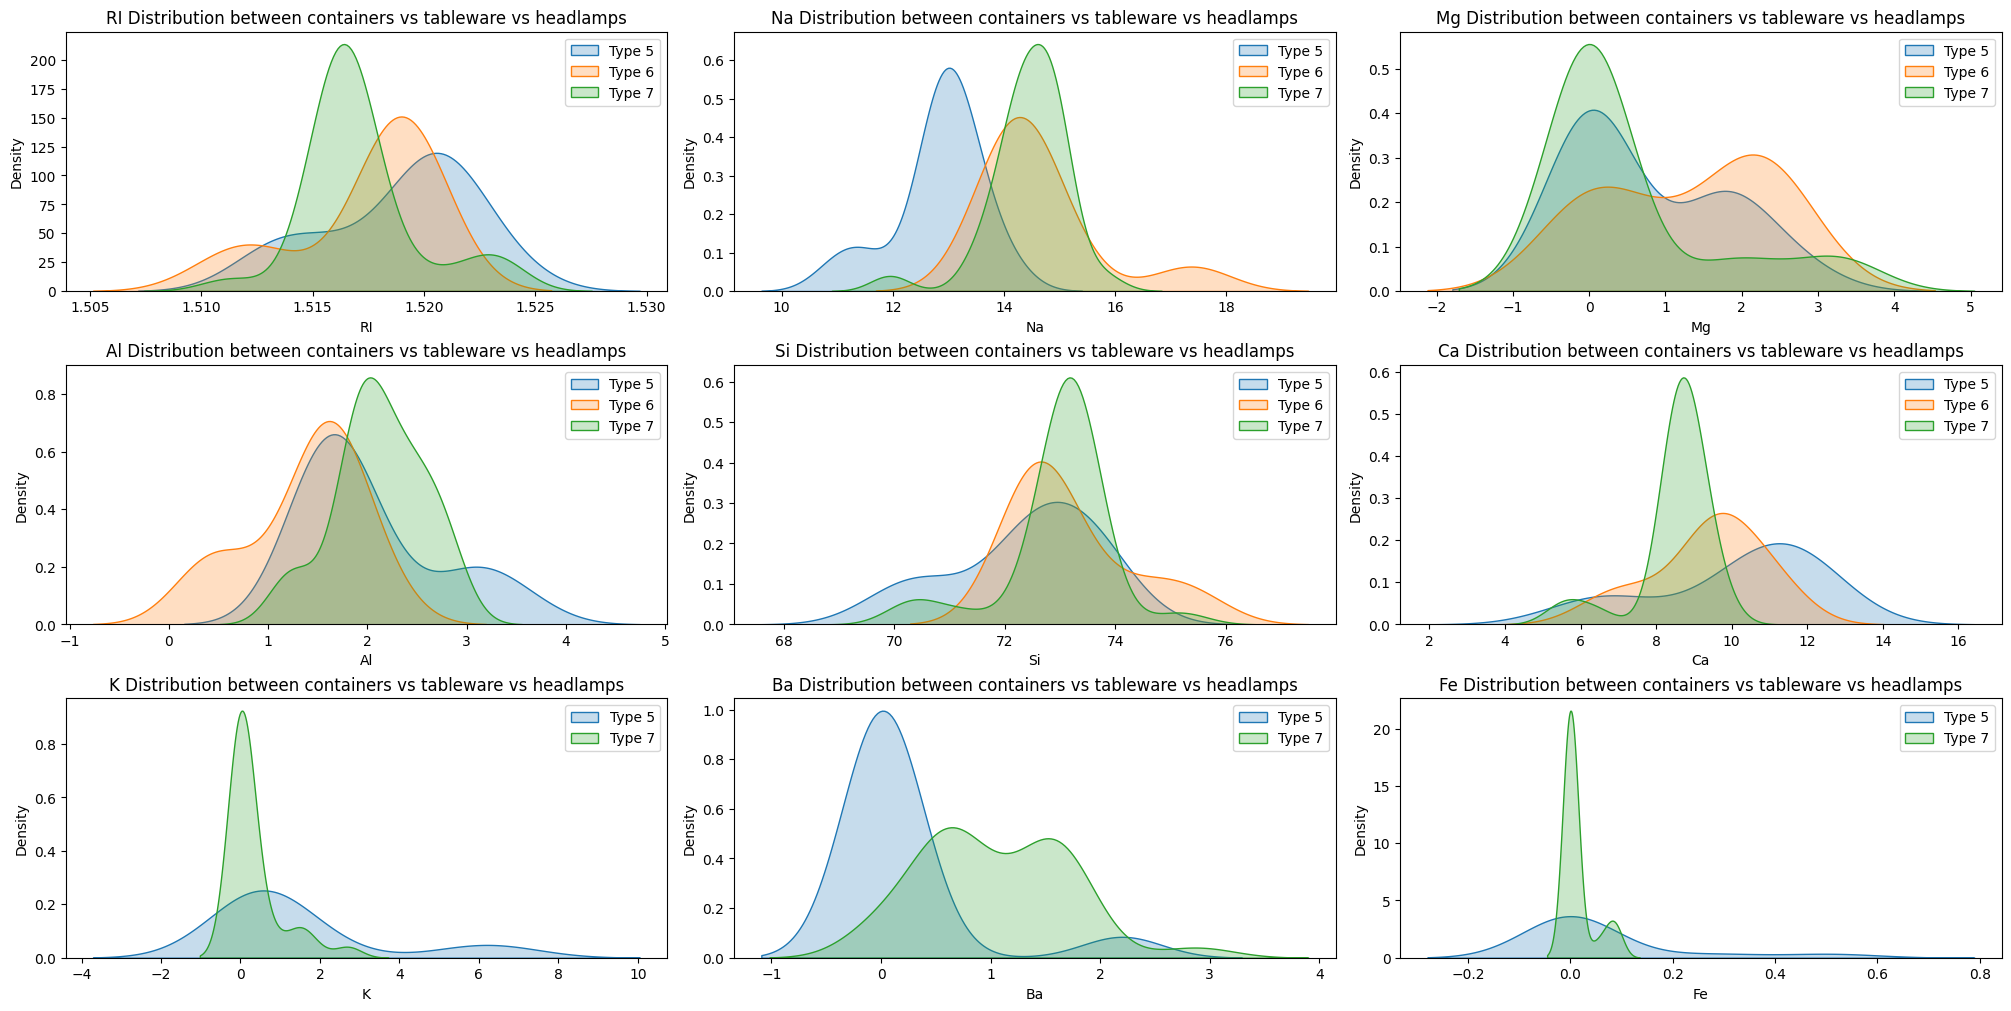

In [30]:
attributes = ['RI', 'Na', 'Mg', 'Al', 'Si','Ca','K','Ba','Fe']
types = [5, 6, 7]

fig, axes = plt.subplots(3, 3, figsize=(20, 10), constrained_layout=True)

for i, attr in enumerate(attributes):
    row, col = i // 3, i % 3 
    ax = axes[row, col] 
    ax.set_title(f"{attr} Distribution between containers vs tableware vs headlamps")

    for glass_type in types:
        sns.kdeplot(df[attr][df.Type == glass_type], shade=True, label=f'Type {glass_type}', ax=ax)

    ax.legend()

plt.show()


- Different variantion were exhibited in type 5,6,7
- K, Ba and Fe show no involvement in type 6 glass type 7 is highly concentrated with less variation and type 5 is low concentration wih high variation 

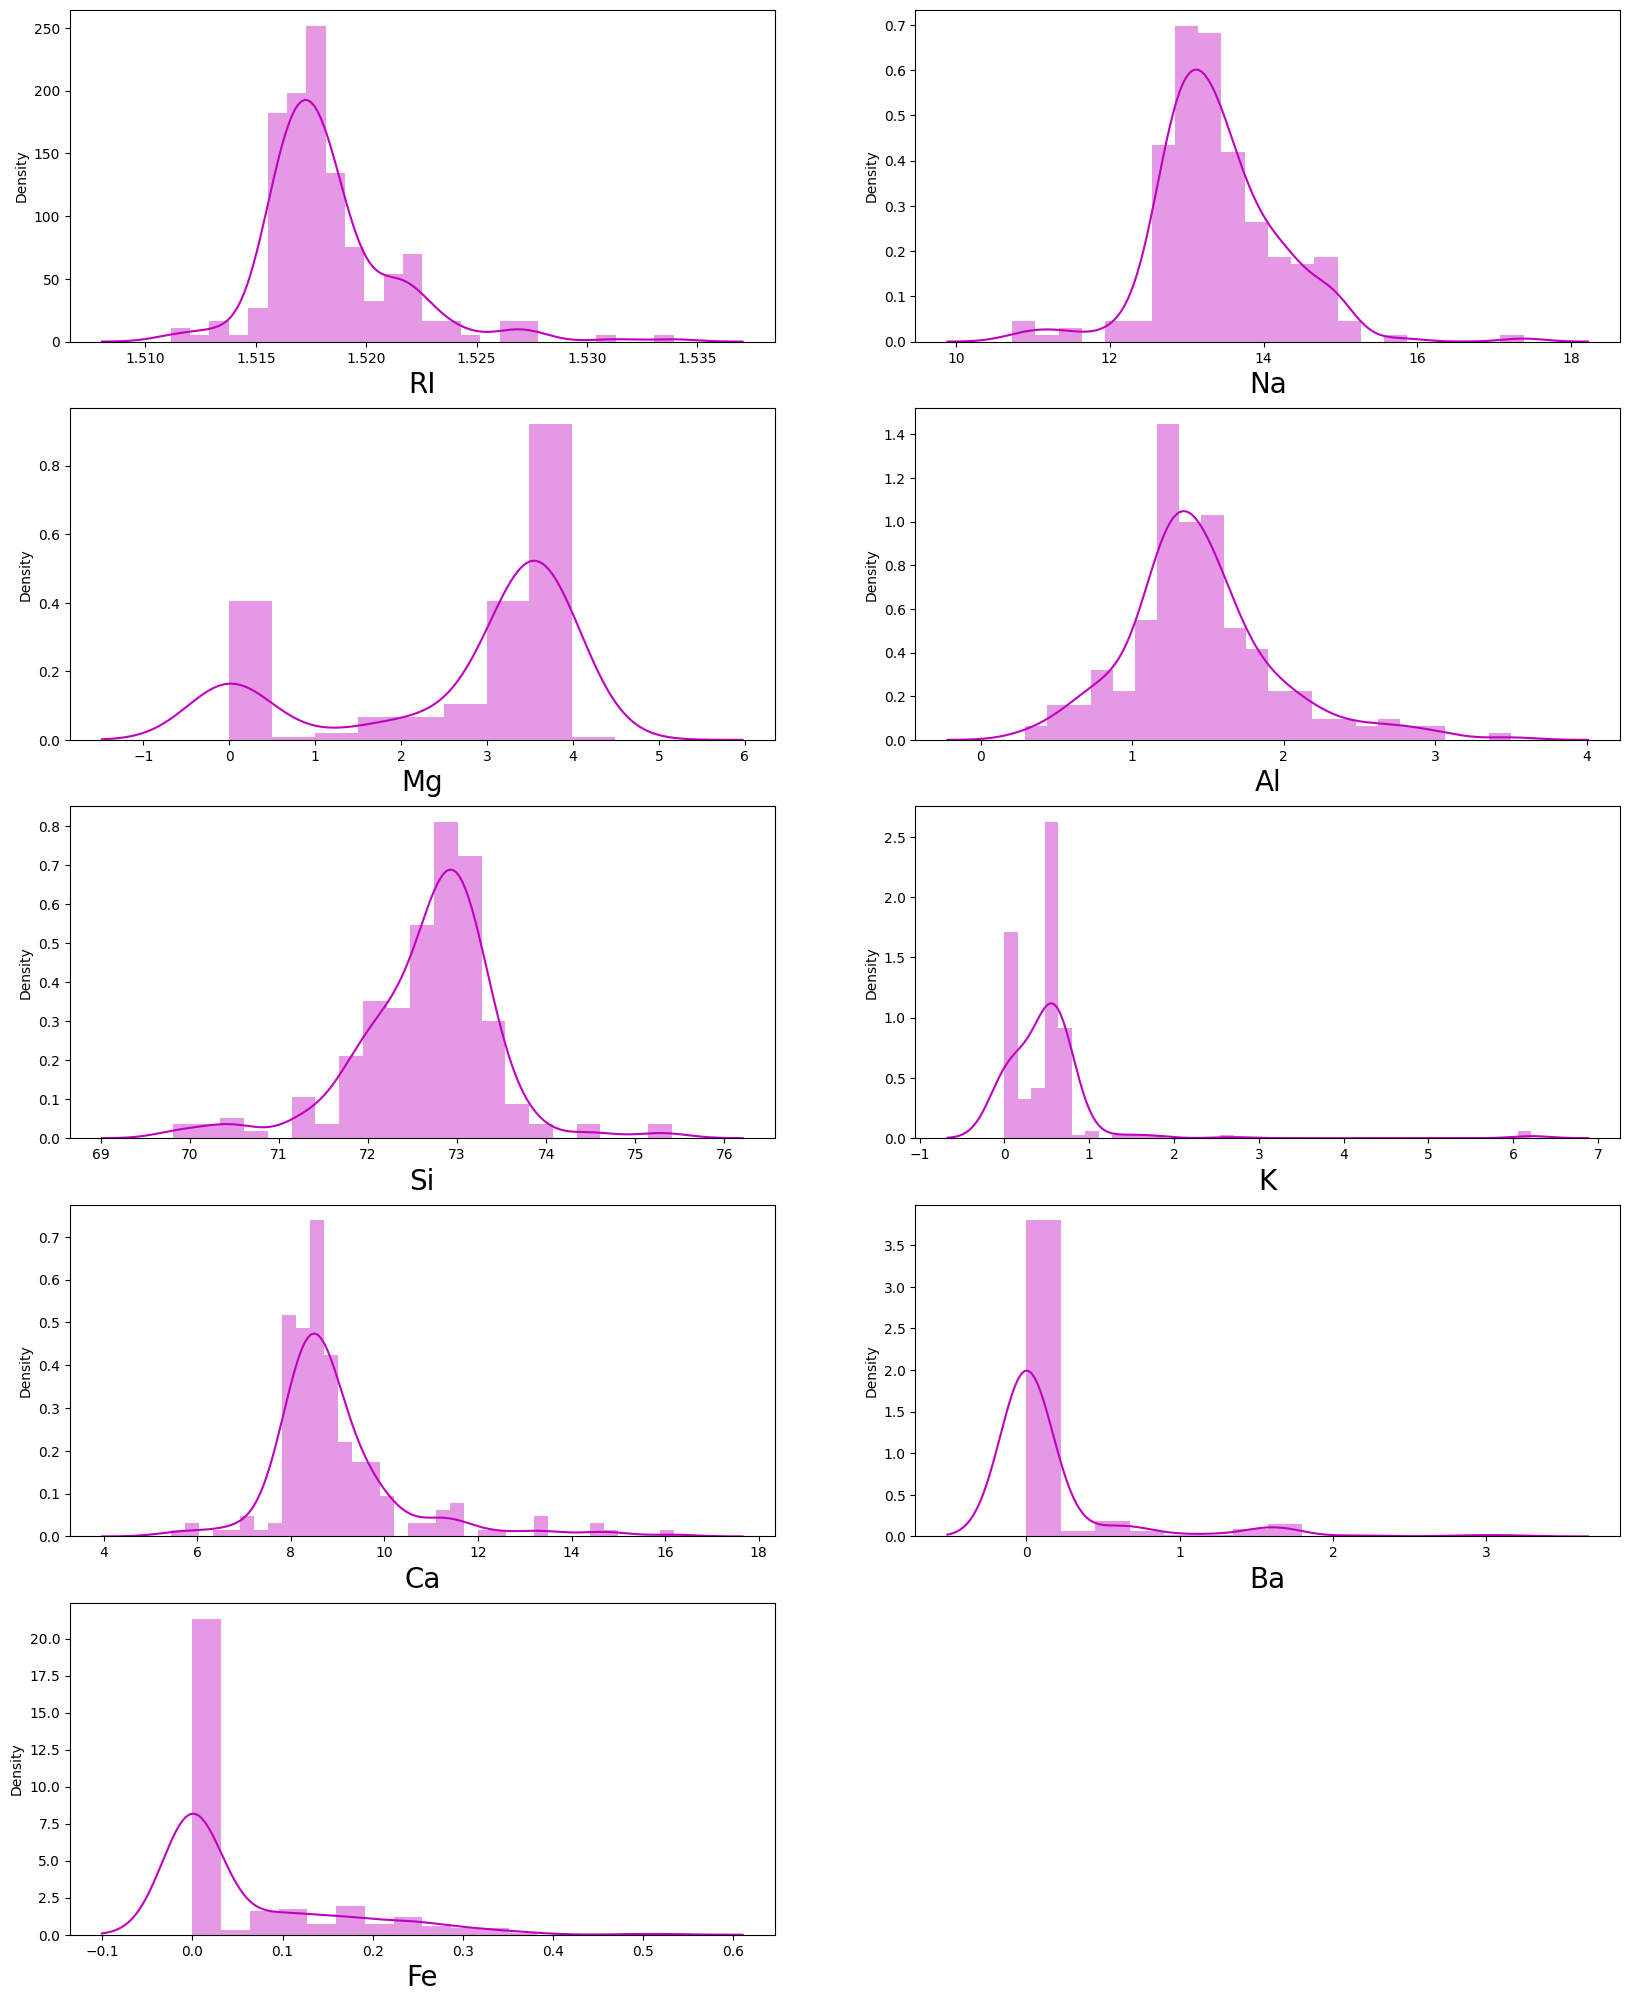

In [31]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber <=11:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

Other than Al all the elements are skewed

In [32]:
skewness = df[['RI', 'Na', 'Mg', 'Al', 'Si','Ca','K','Ba','Fe']].skew()
skewness

RI    1.648017
Na    0.465699
Mg   -1.146096
Al    0.938402
Si   -0.744646
Ca    2.050752
K     6.545429
Ba    3.406749
Fe    1.747173
dtype: float64

In [33]:
sk = np.cbrt(skewness)
sk

RI    1.181192
Na    0.775119
Mg   -1.046503
Al    0.979031
Si   -0.906393
Ca    1.270489
K     1.870593
Ba    1.504689
Fe    1.204422
dtype: float64

Cuberoot is used to remove the skewness

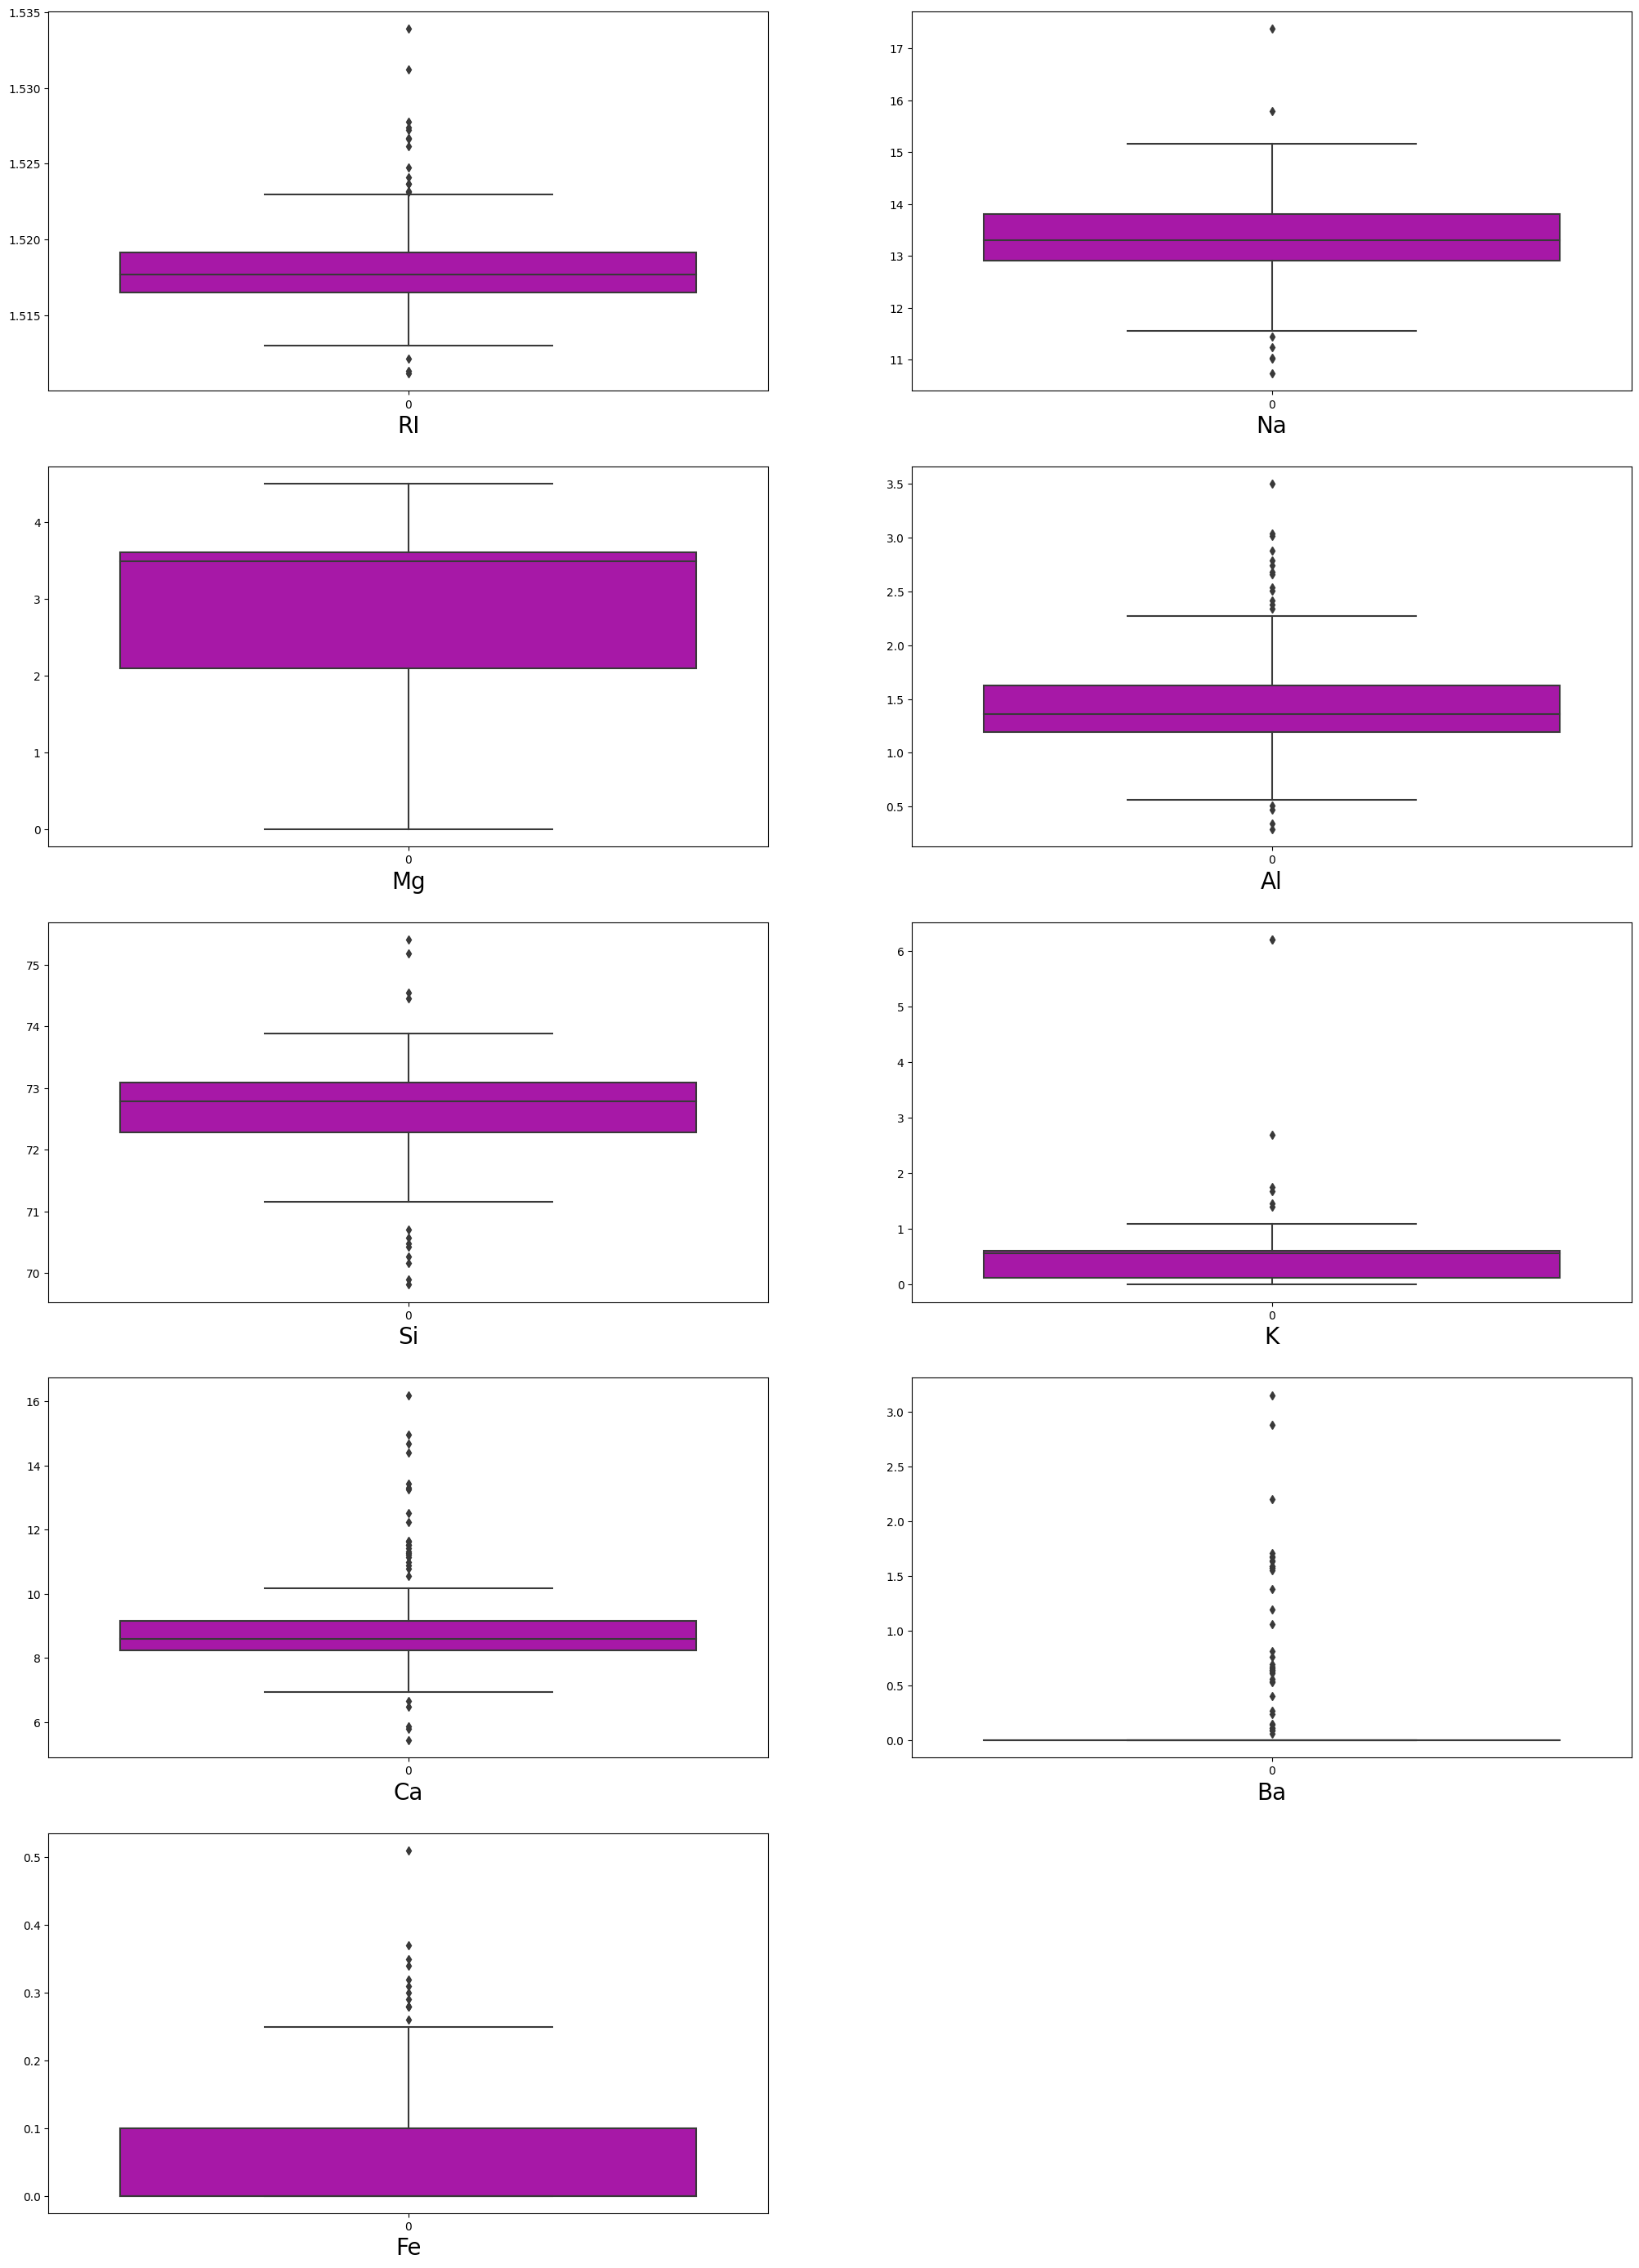

In [34]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber <=11:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

Other than Mg variable all others features have outliers

In [35]:
def cap_outliers(df):
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        # Cap values below Q1 - outlier_step
        lower_bound = Q1 - outlier_step
        df[col][df[col] < lower_bound] = lower_bound

        # Cap values above Q3 + outlier_step
        upper_bound = Q3 + outlier_step
        df[col][df[col] > upper_bound] = upper_bound

    return df

# Cap outliers in your DataFrame
df = cap_outliers(df)

print(df.shape)


(213, 10)


We use interquartile range to remove outliers from data

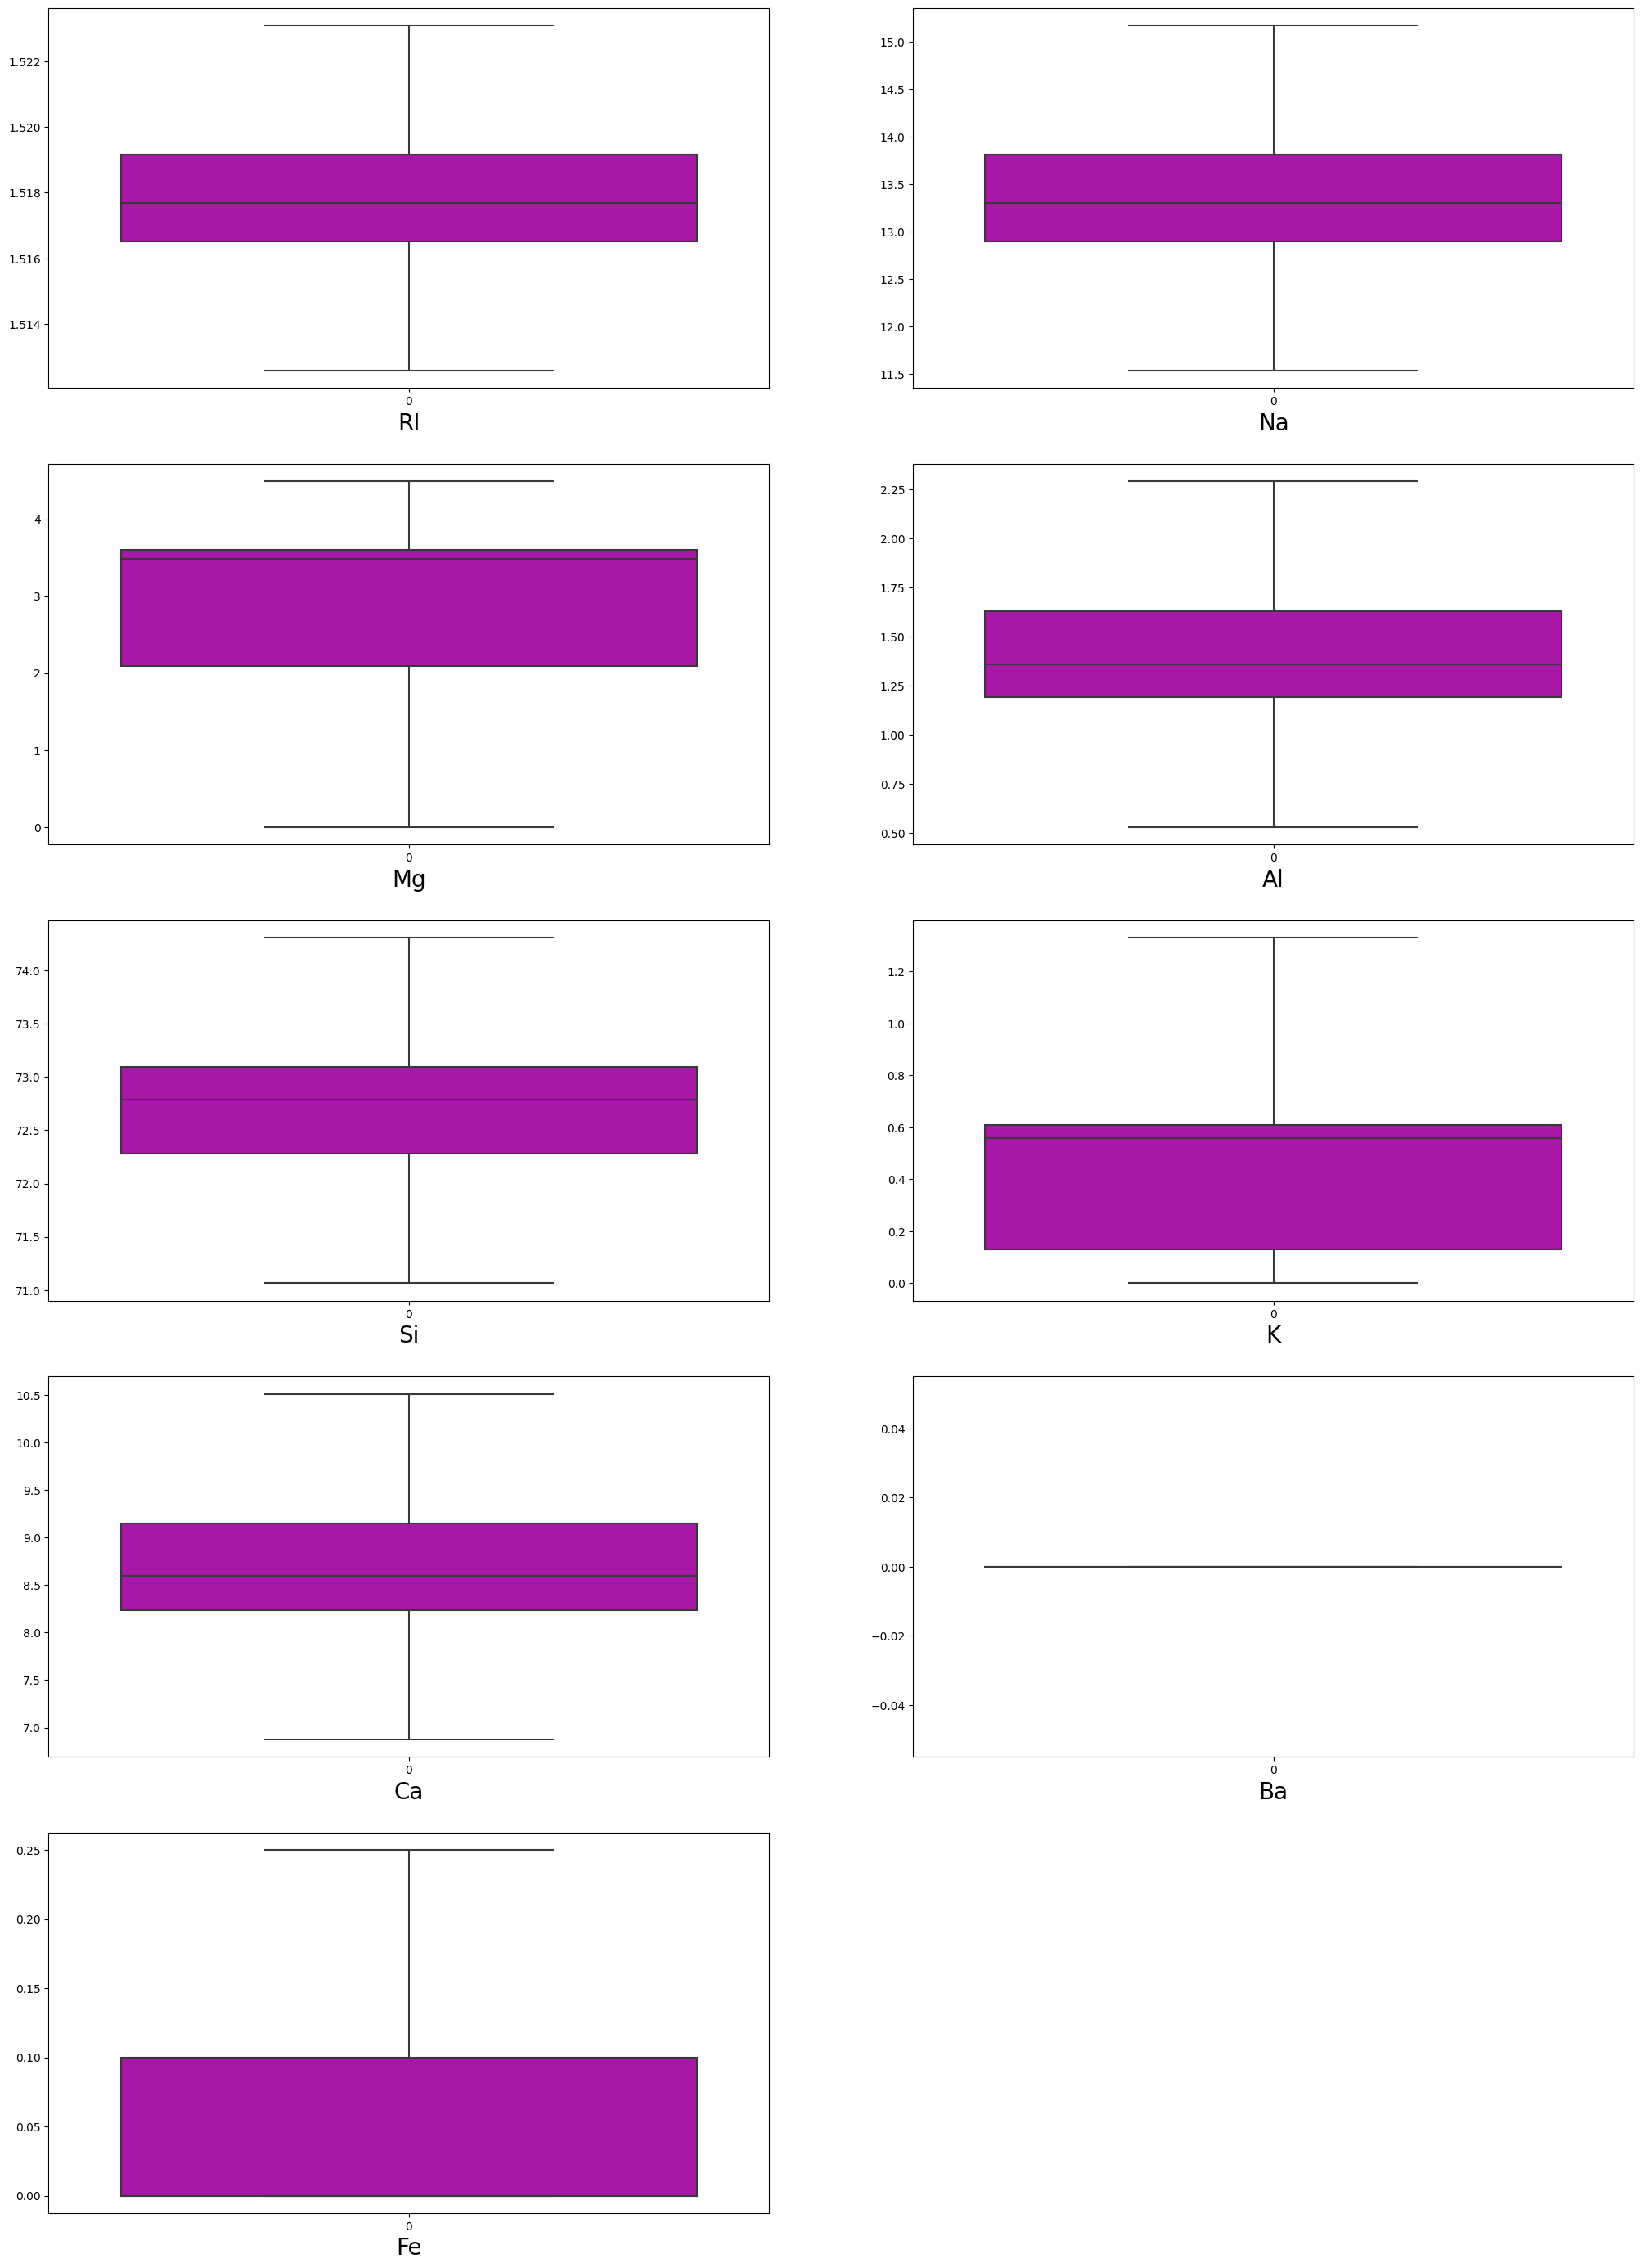

In [36]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber <=11:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

We removed the outliers from dataset

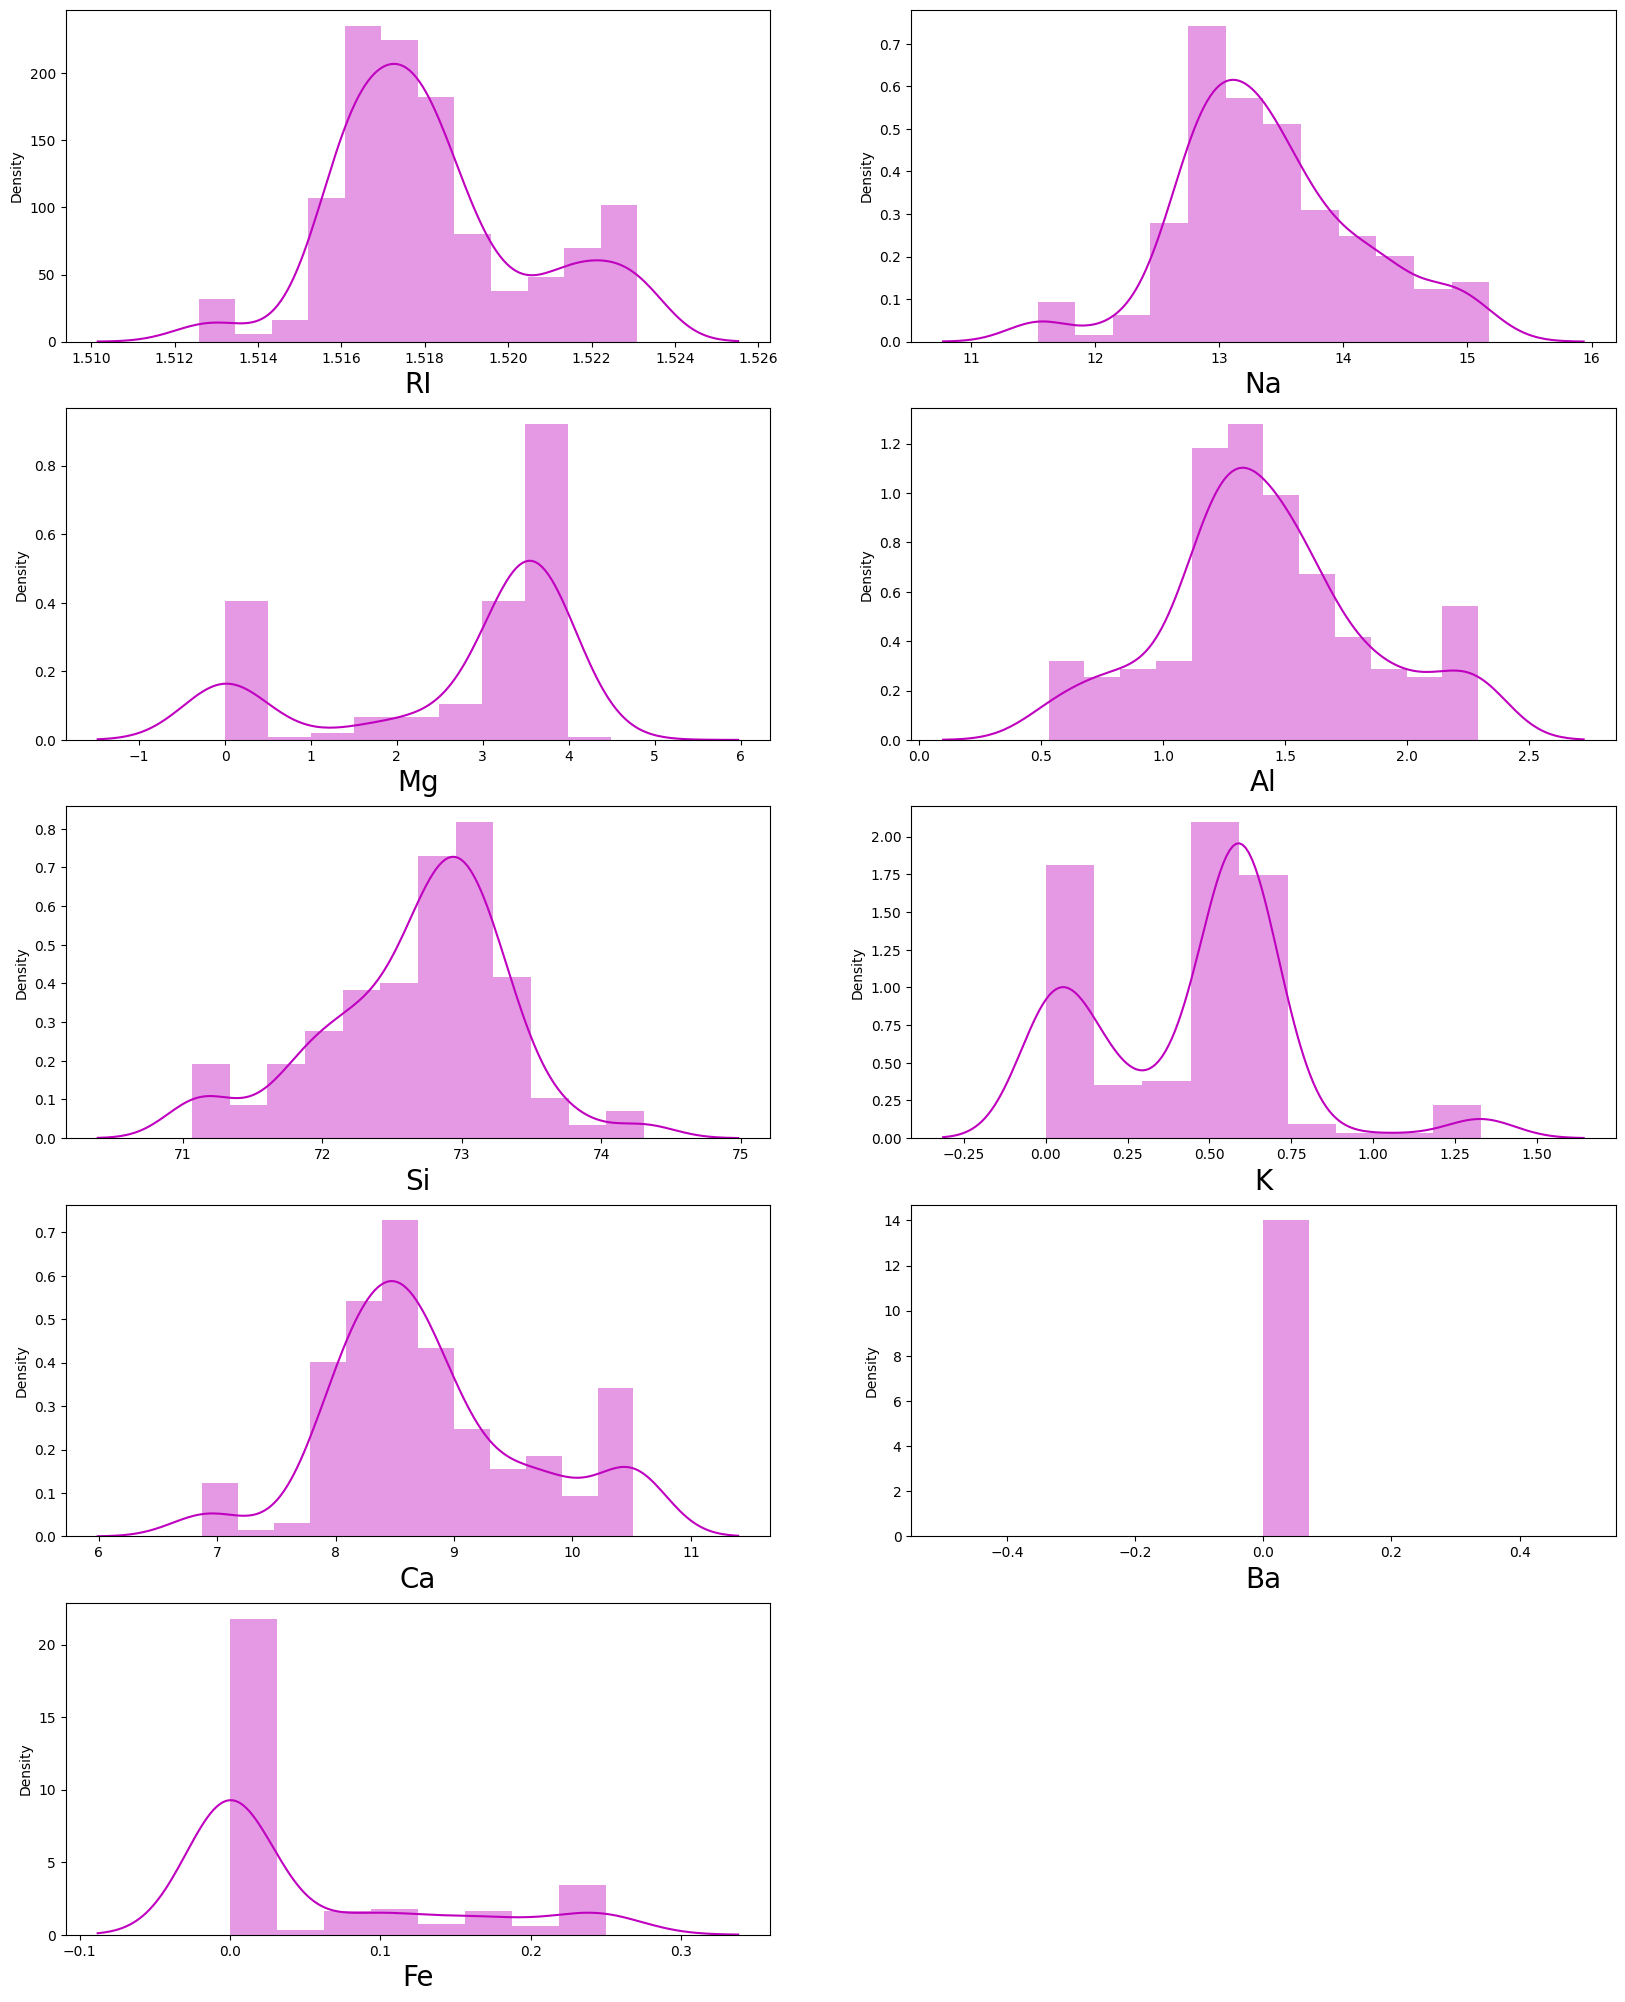

In [37]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber <=11:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

- Data is almost normally distributed 
- Ba is totally out of range and so i intend to remove the column further

In [38]:
df.drop(columns=['Ba'],axis=1,inplace =True)

Removed Ba fromthe dataset

### Multicollinearity 

<Axes: >

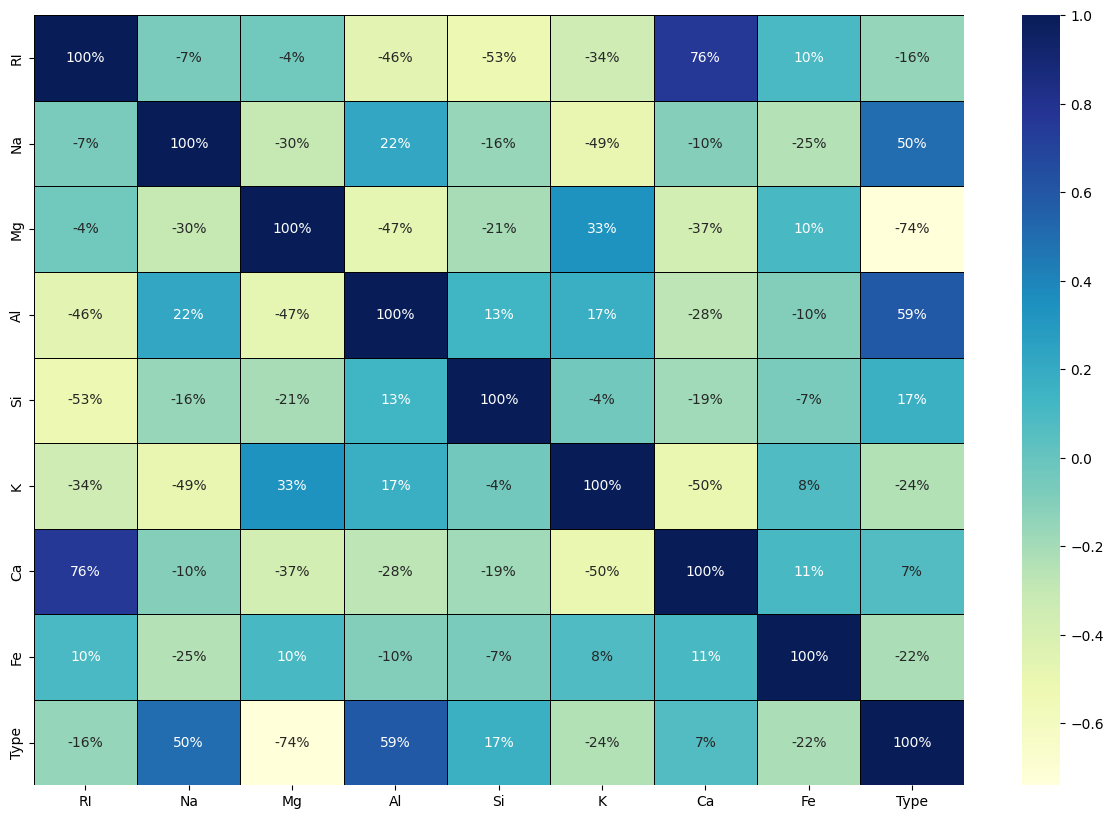

In [39]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,cmap='YlGnBu',annot=True, linewidth=.5,fmt='0.0%',linecolor='black')

- we can see that there are some strong positive and negative correlations between different features

- For instance, 'Ca' and 'RI' show a strong positive correlation, while 'Al' and 'RI' show a strong negative correlation.

In [40]:
corr['Type'].sort_values(ascending = False)

Type    1.000000
Al      0.585616
Na      0.503702
Si      0.166276
Ca      0.073455
RI     -0.155095
Fe     -0.219217
K      -0.243427
Mg     -0.739870
Name: Type, dtype: float64

- Aluminum (Al), Barium (Ba), and Sodium (Na) have the highest positive correlations with the glass type. This means that as the values of these features increase, the glass type also tends to increase.

- Magnesium (Mg) has a strong negative correlation with the glass type, meaning that as the Magnesium content increases, the glass type tends to decrease.

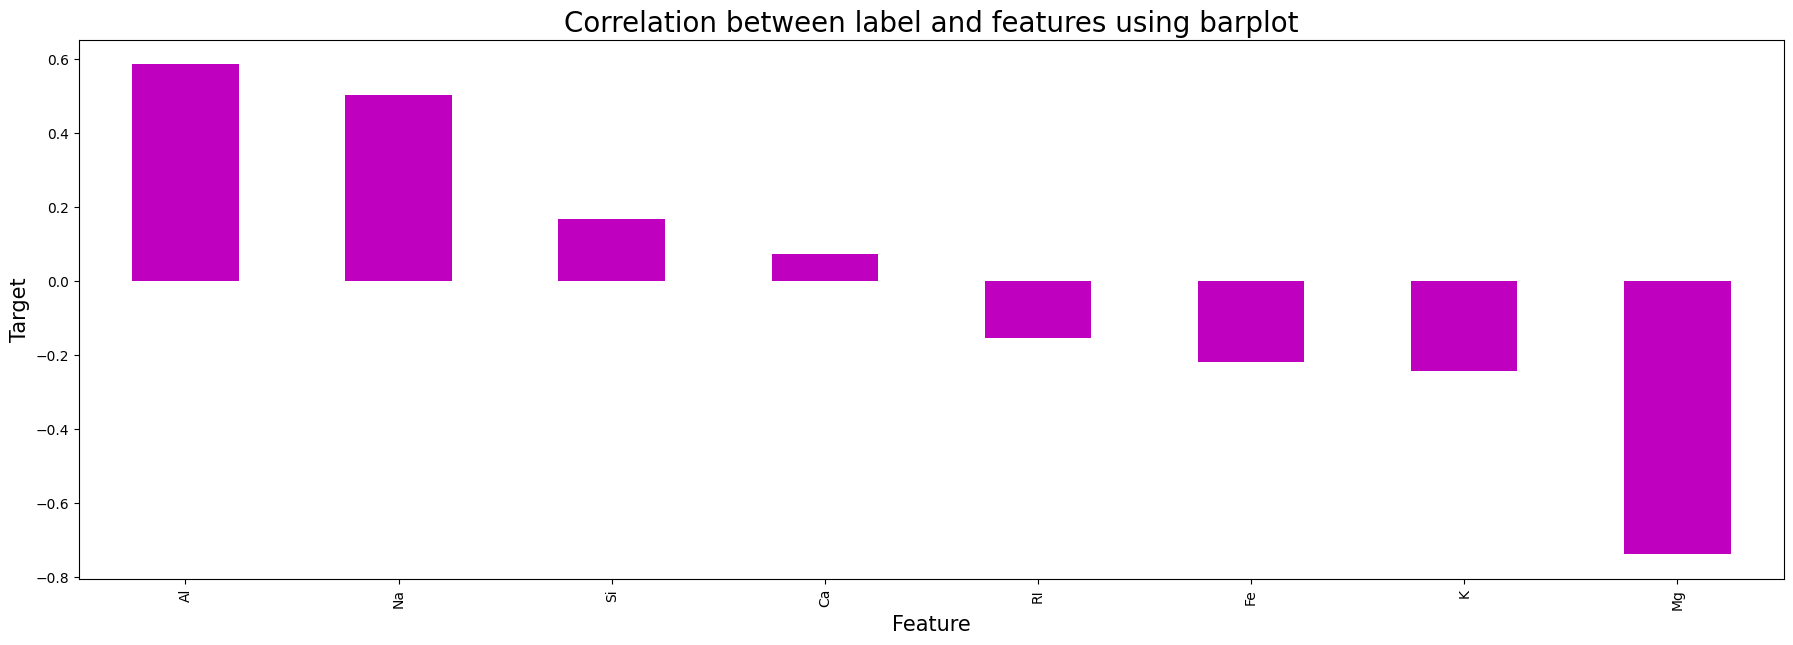

In [41]:
plt.figure(figsize = (22,7))
corr['Type'].sort_values(ascending = False).drop(['Type']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)
plt.show()

- Calcium (Ca) has a weak positive correlation with the glass type
- RI, K, Fe has weak negative correlation with the glass type

In [42]:
X= df.drop(columns = ['Type'],axis=1)
y = df['Type']

Features and Target variables are sepearted for training

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [44]:
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.216093,0.322680,1.257238,-0.773927,-1.361078,-1.253536,-0.044419,-0.621102
1,-0.227207,0.660556,0.639311,-0.154741,0.086641,0.124799,-1.115733,-0.621102
2,-0.834242,0.174014,0.604596,0.273927,0.482859,-0.170559,-1.173956,-0.621102
3,-0.205982,-0.258467,0.701798,-0.321445,-0.096228,0.420156,-0.661589,-0.621102
4,-0.307862,-0.177377,0.653197,-0.440519,0.620012,0.354521,-0.836260,-0.621102
...,...,...,...,...,...,...,...,...
208,-0.813017,0.998432,-1.860172,2.060042,-0.096228,-1.187901,0.456303,-0.621102
209,-0.549827,2.052606,-1.860172,1.345596,0.589533,-1.450441,-0.451984,-0.621102
210,1.063273,1.295764,-1.860172,1.417041,1.138143,-1.450441,-0.405405,-0.621102
211,-0.694157,1.322794,-1.860172,1.226522,1.427687,-1.450441,-0.358827,-0.621102


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

,vif values,Features
0,4.644571,RI
1,2.641674,Na
2,2.715430,Mg
3,2.245368,Al
4,2.313640,Si
5,2.798977,K
6,4.808223,Ca
7,1.089732,Fe


VIF is used to evaluate and detect multicollinearity among independent variables and all variables are below 5 so i consider to keep all variables, other than Ba

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [47]:
maxAccu = 0
maxRs = 0                       
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ', maxAccu, 'at random_state', maxRS)

Best accuracy is  0.9534883720930233 at random_state 83


In [48]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [49]:
# Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()                    
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.813953488372093
[[15  1  0  0  0]
 [ 0 13  1  0  0]
 [ 4  1  0  0  0]
 [ 0  0  0  2  0]
 [ 0  1  0  0  5]]
              precision    recall  f1-score   support

           1       0.79      0.94      0.86        16
           2       0.81      0.93      0.87        14
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.72      0.74      0.73        43
weighted avg       0.74      0.81      0.77        43



In [50]:
# Checking accuracy for KNeighborsClassifier
knn = KNeighborsClassifier()                    
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6976744186046512
[[14  2  0  0  0]
 [ 3 11  0  0  0]
 [ 4  1  0  0  0]
 [ 0  0  0  2  0]
 [ 1  1  0  1  3]]
              precision    recall  f1-score   support

           1       0.64      0.88      0.74        16
           2       0.73      0.79      0.76        14
           3       0.00      0.00      0.00         5
           5       0.67      1.00      0.80         2
           6       1.00      0.50      0.67         6

    accuracy                           0.70        43
   macro avg       0.61      0.63      0.59        43
weighted avg       0.65      0.70      0.65        43



In [51]:
# Checking accuracy for DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.7441860465116279
[[14  1  1  0  0]
 [ 0 11  2  0  1]
 [ 3  0  2  0  0]
 [ 0  0  0  2  0]
 [ 0  3  0  0  3]]
              precision    recall  f1-score   support

           1       0.82      0.88      0.85        16
           2       0.73      0.79      0.76        14
           3       0.40      0.40      0.40         5
           5       1.00      1.00      1.00         2
           6       0.75      0.50      0.60         6

    accuracy                           0.74        43
   macro avg       0.74      0.71      0.72        43
weighted avg       0.74      0.74      0.74        43



In [52]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7209302325581395
[[13  2  1  0  0]
 [ 2 10  1  0  1]
 [ 3  1  1  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  1  5]]
              precision    recall  f1-score   support

           1       0.72      0.81      0.76        16
           2       0.77      0.71      0.74        14
           3       0.33      0.20      0.25         5
           5       0.67      1.00      0.80         2
           6       0.83      0.83      0.83         6

    accuracy                           0.72        43
   macro avg       0.66      0.71      0.68        43
weighted avg       0.71      0.72      0.71        43



In [53]:
# Checking accuracy for AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC .fit(x_train,y_train)
predABC  = ABC .predict(x_test)
print(accuracy_score(y_test,predABC ))
print(confusion_matrix(y_test,predABC ))
print(classification_report(y_test,predABC ))

0.4418604651162791
[[14  2  0  0  0]
 [13  0  0  0  1]
 [ 4  1  0  0  0]
 [ 0  0  0  0  2]
 [ 0  1  0  0  5]]
              precision    recall  f1-score   support

           1       0.45      0.88      0.60        16
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.62      0.83      0.71         6

    accuracy                           0.44        43
   macro avg       0.22      0.34      0.26        43
weighted avg       0.26      0.44      0.32        43



In [54]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.6976744186046512
[[12  3  1  0  0]
 [ 2 10  1  1  0]
 [ 3  0  2  0  0]
 [ 0  0  0  2  0]
 [ 0  1  0  1  4]]
              precision    recall  f1-score   support

           1       0.71      0.75      0.73        16
           2       0.71      0.71      0.71        14
           3       0.50      0.40      0.44         5
           5       0.50      1.00      0.67         2
           6       1.00      0.67      0.80         6

    accuracy                           0.70        43
   macro avg       0.68      0.71      0.67        43
weighted avg       0.72      0.70      0.70        43



In [55]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6976744186046512
[[13  3  0  0  0]
 [ 3 11  0  0  0]
 [ 5  0  0  0  0]
 [ 0  0  0  2  0]
 [ 0  2  0  0  4]]
              precision    recall  f1-score   support

           1       0.62      0.81      0.70        16
           2       0.69      0.79      0.73        14
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         6

    accuracy                           0.70        43
   macro avg       0.66      0.65      0.65        43
weighted avg       0.64      0.70      0.66        43



In [56]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7441860465116279
[[14  2  0  0  0]
 [ 2 11  0  0  1]
 [ 5  0  0  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  1  5]]
              precision    recall  f1-score   support

           1       0.67      0.88      0.76        16
           2       0.85      0.79      0.81        14
           3       0.00      0.00      0.00         5
           5       0.67      1.00      0.80         2
           6       0.83      0.83      0.83         6

    accuracy                           0.74        43
   macro avg       0.60      0.70      0.64        43
weighted avg       0.67      0.74      0.70        43



### Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
score1 = cross_val_score(RFC,x,y)
print(score1)
print('RFC score:',score1.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predRFC)-score1.mean())

[0.62790698 0.62790698 0.72093023 0.64285714 0.73809524]
RFC score: 0.6715393133997785
Difference between Accuracy score and cross validation is:  0.14241417497231457


In [59]:
# Checking cv score for DecisionTreeClassifier
score2 = cross_val_score(DT,x,y)
print(score2)
print('DT score:',score2.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predDT)-score2.mean())

[0.48837209 0.48837209 0.6744186  0.57142857 0.61904762]
DT score: 0.568327796234773
Difference between Accuracy score and cross validation is:  0.17585825027685487


In [60]:
# Checking cv score for KNeighborsClassifier
score3 = cross_val_score(knn,x,y)
print(score3)
print('knn score:',score3.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predknn)-score3.mean())

[0.60465116 0.6744186  0.65116279 0.5952381  0.66666667]
knn score: 0.6384274640088593
Difference between Accuracy score and cross validation is:  0.05924695459579188


In [61]:
score4 = cross_val_score(GB,x,y)
print(score4)
print('GB score:',score4.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predGB)-score4.mean())

[0.65116279 0.65116279 0.72093023 0.61904762 0.78571429]
GB score: 0.6856035437430786
Difference between Accuracy score and cross validation is:  0.03532668881506085


In [62]:
# Checking cv score for AdaBoostClassifier
score5 = cross_val_score(ABC,x,y)
print(score5)
print('ABC score:',score5.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predABC)-score5.mean())

[0.3255814  0.44186047 0.39534884 0.21428571 0.5       ]
ABC score: 0.3754152823920266
Difference between Accuracy score and cross validation is:  0.06644518272425248


In [63]:
# Checking cv score fro BaggingClassifier
score6 = cross_val_score(BC,x,y)
print(score6)
print('BC score:',score6.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predBC)-score6.mean())

[0.6744186  0.48837209 0.72093023 0.61904762 0.71428571]
BC score: 0.6434108527131783
Difference between Accuracy score and cross validation is:  0.054263565891472854


In [64]:
# Checking cv score for Support Vector Machine Classifier
score7 = cross_val_score(svc,x,y)
print(score7)
print('svc score:',score7.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predsvc)-score7.mean())

[0.60465116 0.60465116 0.60465116 0.64285714 0.71428571]
svc score: 0.6342192691029901
Difference between Accuracy score and cross validation is:  0.06345514950166109


In [65]:
# Checking cv score for ExtraTreesClassifier
score8 = cross_val_score(ET,x,y)
print(score8)
print('ET score:',score8.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predET)-score8.mean())

[0.65116279 0.60465116 0.69767442 0.64285714 0.73809524]
ET score: 0.6668881506090808
Difference between Accuracy score and cross validation is:  0.0772978959025471


In [66]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',score7.mean()*100],['Extra Tree Classifier',score8.mean()*100],['Gradient Boost Classifier',score4.mean()*100],
              ['Decision Tree Classifier',score2.mean()*100],['Random Forest Classifier',score1.mean()*100],['KNeighborsClassifier',score3.mean()*100],['AdaBoostClassifier',score5.mean()*100],
              ['Bagging Classifier',score6.mean()*100]],columns=['Models','Accuracy'])

,Models,Accuracy
0,Support Vector Machine,63.421927
1,Extra Tree Classifier,66.688815
2,Gradient Boost Classifier,68.560354
3,Decision Tree Classifier,56.832780
4,Random Forest Classifier,67.153931
5,KNeighborsClassifier,63.842746
6,AdaBoostClassifier,37.541528
7,Bagging Classifier,64.341085


##### The best model is Random Forest Classifier with accuracy of 67.153931 and model generalization is 0.1424

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
# RandomForestClassifier

params = {'n_estimators':[13,15,17,19,21],             
          'criterion':['entropy','gini'],
          'max_depth':[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6],
          'n_jobs': [-2,-1,1],
          'random_state':[10,50,1000]}

In [69]:
GCV = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15, 17, 19, 21],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [70]:
print('best params :', GCV.best_params_) 

best params : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15, 'n_jobs': -2, 'random_state': 50}


In [72]:
Final_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 79.07%


Final_model = RandomForestClassifier( criterion = 'entropy', max_depth = 10,
                                    n_estimators = 15, n_jobs = -2,random_state = 50,
                                    min_samples_leaf = 5, min_samples_split = 11)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc * 100:.2f}%")

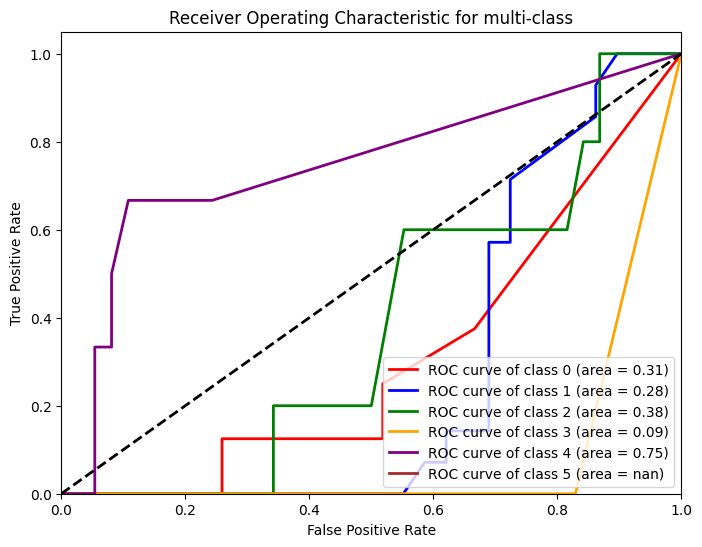

In [74]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 5, 6, 7])


predicted_probabilities = Final_model.predict_proba(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predicted_probabilities[:, i-1])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


In [75]:
import pickle
with open('Glass_Identification_Analysis.pkl', 'wb') as file:
    pickle.dump(Final_model, file)

In [76]:
with open('Glass_Identification_Analysis.pkl', 'rb') as file:
    model = pickle.load(file)

prediction = model.predict(x_test)

In [77]:
rfc=np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =prediction
df['Actual'] = rfc
df

,Predicted,Actual
0,1,1
1,1,1
2,2,1
3,2,2
4,3,2
5,1,1
6,1,1
7,1,1
8,1,3
9,6,6
